# Problem Statement

**PROJECTO 1** <br>
**Análisis exploratorio y modelado predictivo de precios de viviendas en Barcelona usando Python y SQL**

## Objective
Desarrollar un análisis completo y un modelo predictivo para los precios de viviendas en Barcelona, utilizando datos extraídos del portal Fotocasa. El objetivo es aplicar técnicas de extracción, manipulación y análisis de datos, así como algoritmos de Machine Learning, para predecir los precios de las viviendas en función de diversas características.

## Data Description
- **price**: The price of the real-state.
- **rooms**: Number of rooms.
- **bathroom**: Number of bathrooms.
- **lift**: whether a building has an elevator (also known as a lift in some regions) or not
- **terrace**: If it has a terrace or not.
- **square_meters**: Number of square meters.
- **real_state**: Kind of real-state.
- **neighborhood**: Neighborhood
- **square_meters_price**: Price of the square meter

## Importing necessary libraries

In [115]:
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
%matplotlib inline
sns.set_style('whitegrid') # set style for visualization

# To supress warnings
import warnings # ignore warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore

#normalizing
from sklearn.preprocessing import MinMaxScaler, StandardScaler # to scale the data

# modeling
import statsmodels.api as sm # adding a constant to the independent variables
from sklearn.model_selection import train_test_split # splitting data in train and test sets

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# for validation
from sklearn.model_selection import cross_val_score, KFold


## Loading the Dataset

In [4]:
df=pd.read_csv('Barcelona_Fotocasa_HousingPrices.csv')

# Data Overview

In [5]:
df.head() # preview a sample first 5 rows

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
0,0,750,3,1,True,False,60,flat,Horta- Guinardo,12.500000
1,1,770,2,1,True,False,59,flat,Sant Andreu,13.050847
2,2,1300,1,1,True,True,30,flat,Gràcia,43.333333
3,3,2800,1,1,True,True,70,flat,Ciutat Vella,40.000000
4,4,720,2,1,True,False,44,flat,Sant Andreu,16.363636


In [6]:
df.tail() # preview a sample last 5 rows

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
8183,8183,1075,2,2,False,False,65,flat,Gràcia,16.538462
8184,8184,1500,3,2,True,False,110,flat,Eixample,13.636364
8185,8185,1500,2,2,True,True,90,flat,Sarria-Sant Gervasi,16.666667
8186,8186,1500,3,2,True,False,110,flat,Eixample,13.636364
8187,8187,1500,3,2,True,False,110,flat,Eixample,13.636364


In [7]:
df.sample(20) # preview a sample random n rows

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
1314,1314,1550,2,2,True,False,90,flat,Eixample,17.222222
8131,8131,1800,2,1,True,True,80,flat,Gràcia,22.500000
3463,3463,916,2,1,True,False,68,flat,Ciutat Vella,13.470588
3366,3366,748,2,1,True,False,40,flat,Sant Martí,18.700000
8117,8117,758,2,1,True,False,49,flat,Sant Andreu,15.469388
2519,2519,625,0,1,False,False,45,NaN,Ciutat Vella,13.888889
2916,2916,6000,5,4,True,False,290,flat,Sarria-Sant Gervasi,20.689655
4812,4812,1200,3,2,False,False,85,flat,Eixample,14.117647
6104,6104,950,3,1,True,False,90,flat,Sarria-Sant Gervasi,10.555556
2481,2481,950,2,1,True,False,76,flat,Gràcia,12.500000


In [8]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.") # number of observations and features


There are 8188 rows and 10 columns.


In [9]:
df.dtypes # data types

Unnamed: 0               int64
price                    int64
rooms                    int64
bathroom                 int64
lift                      bool
terrace                   bool
square_meters            int64
real_state              object
neighborhood            object
square_meters_price    float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8188 non-null   int64  
 1   price                8188 non-null   int64  
 2   rooms                8188 non-null   int64  
 3   bathroom             8188 non-null   int64  
 4   lift                 8188 non-null   bool   
 5   terrace              8188 non-null   bool   
 6   square_meters        8188 non-null   int64  
 7   real_state           7920 non-null   object 
 8   neighborhood         8188 non-null   object 
 9   square_meters_price  8188 non-null   float64
dtypes: bool(2), float64(1), int64(5), object(2)
memory usage: 527.9+ KB


In [11]:
df.describe(include="all").T # statistical summary of the data.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,8188.0,NaN,NaN,NaN,4093.5,2363.816335,0.0,2046.75,4093.5,6140.25,8187.0
price,8188.0,NaN,NaN,NaN,1444.092574,1125.886215,320.0,875.0,1100.0,1540.0,15000.0
rooms,8188.0,NaN,NaN,NaN,2.420738,1.138592,0.0,2.0,2.0,3.0,10.0
bathroom,8188.0,NaN,NaN,NaN,1.508793,0.732798,1.0,1.0,1.0,2.0,8.0
lift,8188,2,True,5710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
terrace,8188,2,False,6518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_meters,8188.0,NaN,NaN,NaN,84.610161,47.874028,10.0,56.0,73.0,95.0,679.0
real_state,7920,4,flat,6505,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood,8188,10,Eixample,2401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_meters_price,8188.0,NaN,NaN,NaN,17.739121,9.245241,4.910714,12.790698,15.306122,19.444444,186.666667


In [12]:
# Uniques
df.nunique() # Checking for number of variations in the data


Unnamed: 0             8188
price                   889
rooms                    10
bathroom                  8
lift                      2
terrace                   2
square_meters           278
real_state                4
neighborhood             10
square_meters_price    2921
dtype: int64

In [13]:
for i in df.columns: # Checking uniques
    print (i,": ",df[i].unique())

Unnamed: 0 :  [   0    1    2 ... 8185 8186 8187]
price :  [  750   770  1300  2800   720  1100  1350   900  1165  1050  2500  1335
  2200   980  1500  1080   950   850  1800  2300   842  1180  1200  1400
   852  1250  1000  1600  1450  1246  1580  1950  1060  2700   625  2550
   925  1290  3000   780  1053   650  1190   660  1585  1850   710  3468
  1700   590  3300   700  2900   825  2000  2850  2057  3144  1550  2400
   976  2021  1540  4000   890  1970  1210  1185  2250  1900  3500   795
   895   995  1170   730  1750  1220   800  1195   930   990  1150  1475
  5250   702  1175  1360   690  1690  1130  5720  2290  3600  1480  1835
  2050  3200  3768  2229  2150  1806  2155  2317  2008  2040  2760  1425
  1495  3400  3800  1125   970  8482  3219  1626  1724  5000   935  1590
  5200  2600  1650  6800  6000   975  4900  8000  1975  8500  1949  1385
   550  3833  4600  3850  9075  7000  5300  4700   620   920  1085  1675
  2580   520   840   760 10000  2520  3900  2975  6500  4200  245

In [14]:
# Uniques
cat_cols = df.select_dtypes(include=['category', 'object','bool']).columns.tolist()
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)


lift
True     5710
False    2478
Name: count, dtype: int64
--------------------------------------------------
terrace
False    6518
True     1670
Name: count, dtype: int64
--------------------------------------------------
real_state
flat         6505
apartment     991
attic         315
study         109
Name: count, dtype: int64
--------------------------------------------------
neighborhood
Eixample               2401
Sarria-Sant Gervasi    1396
Ciutat Vella           1365
Gràcia                  688
Sant Martí              617
Sants-Montjuïc          590
Les Corts               524
Horta- Guinardo         315
Sant Andreu             178
Nou Barris              114
Name: count, dtype: int64
--------------------------------------------------


In [15]:
# Duplicates
df.duplicated().sum() # Checking for duplicate entries in the data

np.int64(0)

# Notes on Data Overview

- There are 8188 rows and 10 columns.
- The variable 'Unnamed' represent index and should be deleted from data
- Data types are aligned with information
- There is missing data (NaN) on variable 'real_state'. To be replaced by "unknown"
- There are four types of real states being the most common "flat"
- Most units do not have terrace
- Most units do have lift
- The neighborhood with largest unit count is "Eixample"
- Units size goes from 10m2 to 679m2, with a mean of 84.61m2
- Units prices goes from 320EUR to 15000EUR/month, with mean of 1444EUR/month
- price range is assumed referred to monthly rent, so considered as EUR per month
- Units prices by square meter goes from 4.9EUR/m2/month to 186EUR/m2/month, with mean of 17.7EUR/m2/month
- There are units listed with cero rooms
- Target variable for modeling is "priceS"

# Exploratory Data Analysis (EDA)

## EDA Functions

In [16]:
def univariate_numerical(data):
    '''
    Function to generate two plots for each numerical variable
    Histplot for variable distribution
    Boxplot for statistical summary 
    '''
    # Select numerical columns
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    
    # Determine the number of rows and columns
    num_vars = len(numerical_cols)
    num_cols = 4
    num_rows = int(np.ceil(num_vars * 2 / num_cols))
    
    # Create a figure with the specified size
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, num_rows * 5))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Plot each variable with a histplot and a boxplot
    for i, col in enumerate(numerical_cols):
        mean_value = data[col].mean()
        
        # Histplot with KDE
        sns.histplot(data[col], kde=True, ax=axes[i*2])
        axes[i*2].axvline(mean_value, color='r', linestyle='--')
        axes[i*2].set_title(f'Distribution of {col}')
        axes[i*2].text(mean_value, axes[i*2].get_ylim()[1]*0.8, f'Mean: {mean_value:.2f}', color='r', va='baseline', ha='left',rotation=90)
        
        # Boxplot
        sns.boxplot(y=data[col], ax=axes[i*2 + 1])
        axes[i*2 + 1].axhline(mean_value, color='r', linestyle='--')
        axes[i*2 + 1].set_title(f'Boxplot of {col}')
        axes[i*2 + 1].text(axes[i*2 + 1].get_xlim()[1]*0.8, mean_value, f'mean: {mean_value:.2f}', color='r', va='baseline', ha='right')
    
    # Hide any remaining empty subplots
    for j in range(num_vars * 2, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [17]:
def univariate_categorical(data):
    '''
    Function to generate countplot for each categorical variable
    Labeled with count and percentage
    '''
    # List of categorical columns
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Number of columns in the grid
    num_cols = 4
    
    # Calculate the number of rows needed
    num_rows = (len(categorical_columns) + num_cols - 1) // num_cols
    
    # Create the grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, num_rows * 5), constrained_layout=True)
    axes = axes.flatten()
    
    # Plot each countplot in the grid
    for i, col in enumerate(categorical_columns):
        ax = axes[i]
        plot = sns.countplot(x=col, data=data, order=data[col].value_counts().index, ax=ax)
        ax.set_title(f'Count of {col}')
           
        # Add total count and percentage annotations
        total = len(data)
        for p in plot.patches:
            height = p.get_height()
            percentage = f'{(height / total * 100):.1f}%'
            plot.text(x=p.get_x() + p.get_width() / 2,
                      y=height + 2,
                      s=f'{height:.0f}\n({percentage})',
                      ha='center')
        
        # Limit x-axis labels to avoid overlap
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Show the plot
    plt.show()


In [18]:
# Function to plot crosstab with labels
def plot_crosstab_bar_count(df, var_interest):
    '''
    Function to create a barplot of crosstab of the variable of interest vs each of the rest of categorical variables
    Labeled with counts
    '''
    # Extract categorical columns excluding the variable of interest
    cat_cols = df.select_dtypes(include=['category', 'object','bool']).columns.tolist()
    cat_cols.remove(var_interest)
    
    # Determine the grid size
    num_vars = len(cat_cols)
    num_cols = 3  # Number of columns in the grid
    num_rows = (num_vars // num_cols) + int(num_vars % num_cols > 0)

    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, num_rows * 5), constrained_layout=True)
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(cat_cols):
        # Create a crosstab
        crosstab = pd.crosstab(df[col], df[var_interest])
        
        # Plot the crosstab as a bar plot
        crosstab.plot(kind='bar', stacked=True, ax=axes[i])
        
        # Annotate counts in the middle of each bar section
        for bar in axes[i].patches:
            height = bar.get_height()
            if height > 0:
                axes[i].annotate(f'{int(height)}', 
                                 (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                                 ha='center', va='center', fontsize=10, color='black')
        
        # Add total labels at the top of each bar
        totals = crosstab.sum(axis=1)
        for j, total in enumerate(totals):
            axes[i].annotate(f'Total: {total}', 
                             (j, totals[j]), 
                             ha='center', va='bottom', weight='bold')

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Usage
#plot_crosstab_bar_count(df, var_interest='var_interest')

In [19]:
def plot_crosstab_heat_perc(df, var_interest,df_name="DataFrame"):
    '''
    Function to create a heatmap of crosstab of the variable of interest vs each of the rest of catagorical variables
    Labeled with counts, percentage by row, percentage by column
    '''
    # Extract categorical columns excluding the variable of interest
    cat_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()
    cat_cols.remove(var_interest)
    
    # Determine the grid size
    num_vars = len(cat_cols)
    num_cols = 3  # Number of columns in the grid
    num_rows = (num_vars // num_cols) + int(num_vars % num_cols > 0)

    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6*num_cols, num_rows * 6))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(cat_cols):
        # Create crosstabs
        crosstab = pd.crosstab(df[col], df[var_interest])
        crosstab_perc_row = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
        crosstab_perc_col = crosstab.div(crosstab.sum(axis=0), axis=1) * 100

        # Combine counts with percentages
        crosstab_combined = crosstab.astype(str) + "\n" + \
                            crosstab_perc_row.round(2).astype(str) + "%" + "\n" + \
                            crosstab_perc_col.round(2).astype(str) + "%"

        # Plot the crosstab as a heatmap
        sns.heatmap(crosstab, annot=crosstab_combined, fmt='', cmap='Blues', ax=axes[i], cbar=False, annot_kws={"size": 8})
        axes[i].set_title(f'Crosstab of {col} and {var_interest} - {df_name}', fontsize=12)

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to prevent label overlapping
    plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Add more space between subplots
    plt.tight_layout()
    plt.show()
    
# Usage
#plot_crosstab_heat_perc(df, var_interest='var_interest')

In [20]:
def boxplot_by_group(df, group, var, outliers, df_name="DataFrame"):
    '''
    boxplot for a numerical variable of interest vs a categorical variable
    with or without outliers
    includes data mean and mean by category
    '''
    # Calculate the average for the variable
    var_avg = df[var].mean()
    
    # Calculate variable mean per group
    var_means = df.groupby(group)[var].mean()
    
    # Sort by means and get the sorted order
    var_sorted = var_means.sort_values(ascending=False).index
    
    # Reorder the DataFrame by the sorted group
    df[group] = pd.Categorical(df[group], categories=var_sorted, ordered=True)
    
    # Create the boxplot with the reordered sectors
    ax = sns.boxplot(data=df, x=group, y=var, order=var_sorted, showfliers=outliers)
    
    # Add horizontal line for average variable value
    plt.axhline(var_avg, color='red', linestyle='--', label=f'Avg {var}: {var_avg:.2f}')
    
    # Scatter plot for means
    x_positions = range(len(var_means.sort_values(ascending=False)))
    plt.scatter(x=x_positions, y=var_means.sort_values(ascending=False), color='red', label='Mean', zorder=5)
    
    # Add labels to each red dot with the mean value
    for i, mean in enumerate(var_means.sort_values(ascending=False)):
        plt.text(i, mean, f'{mean:.2f}', color='red', ha='center', va='bottom')
    
    # Rotate x-axis labels
    plt.xticks(ticks=x_positions, labels=var_means.sort_values(ascending=False).index, rotation=90)
    
    # Add a legend
    plt.legend()
    plt.xlabel('')  # Remove x-axis title
    
    # Add plot title with DataFrame name
    plt.title(f'Boxplot of {var} by {group} - {df_name}')
    
    # Adjust layout
    plt.tight_layout()
    
    # Display the plot
    #plt.show()


**Functions:**
- univariate_numerical(data): Function to generate two plots for each numerical variable. Histplot for variable distribution. Boxplot for statistical summary
- univariate_categorical(data): Function to generate countplot for each categorical variable. Labeled with count and percentage
- plot_crosstab_bar_count(df, var_interest): Function to create a barplot of crosstab of the variable of interest vs each of the rest of categorical variables. Labeled with counts
- plot_crosstab_heat_perc(df, var_interest): Function to create a heatmap of crosstab of the variable of interest vs each of the rest of catagorical variables. Labeled with counts, percentage by row, percentage by column
- boxplot_by_group(df, group, var, outliers): boxplot for a numerical variable of interest vs a categorical variable. with or without outliers. includes data mean and mean by category

## Univariate Analysis

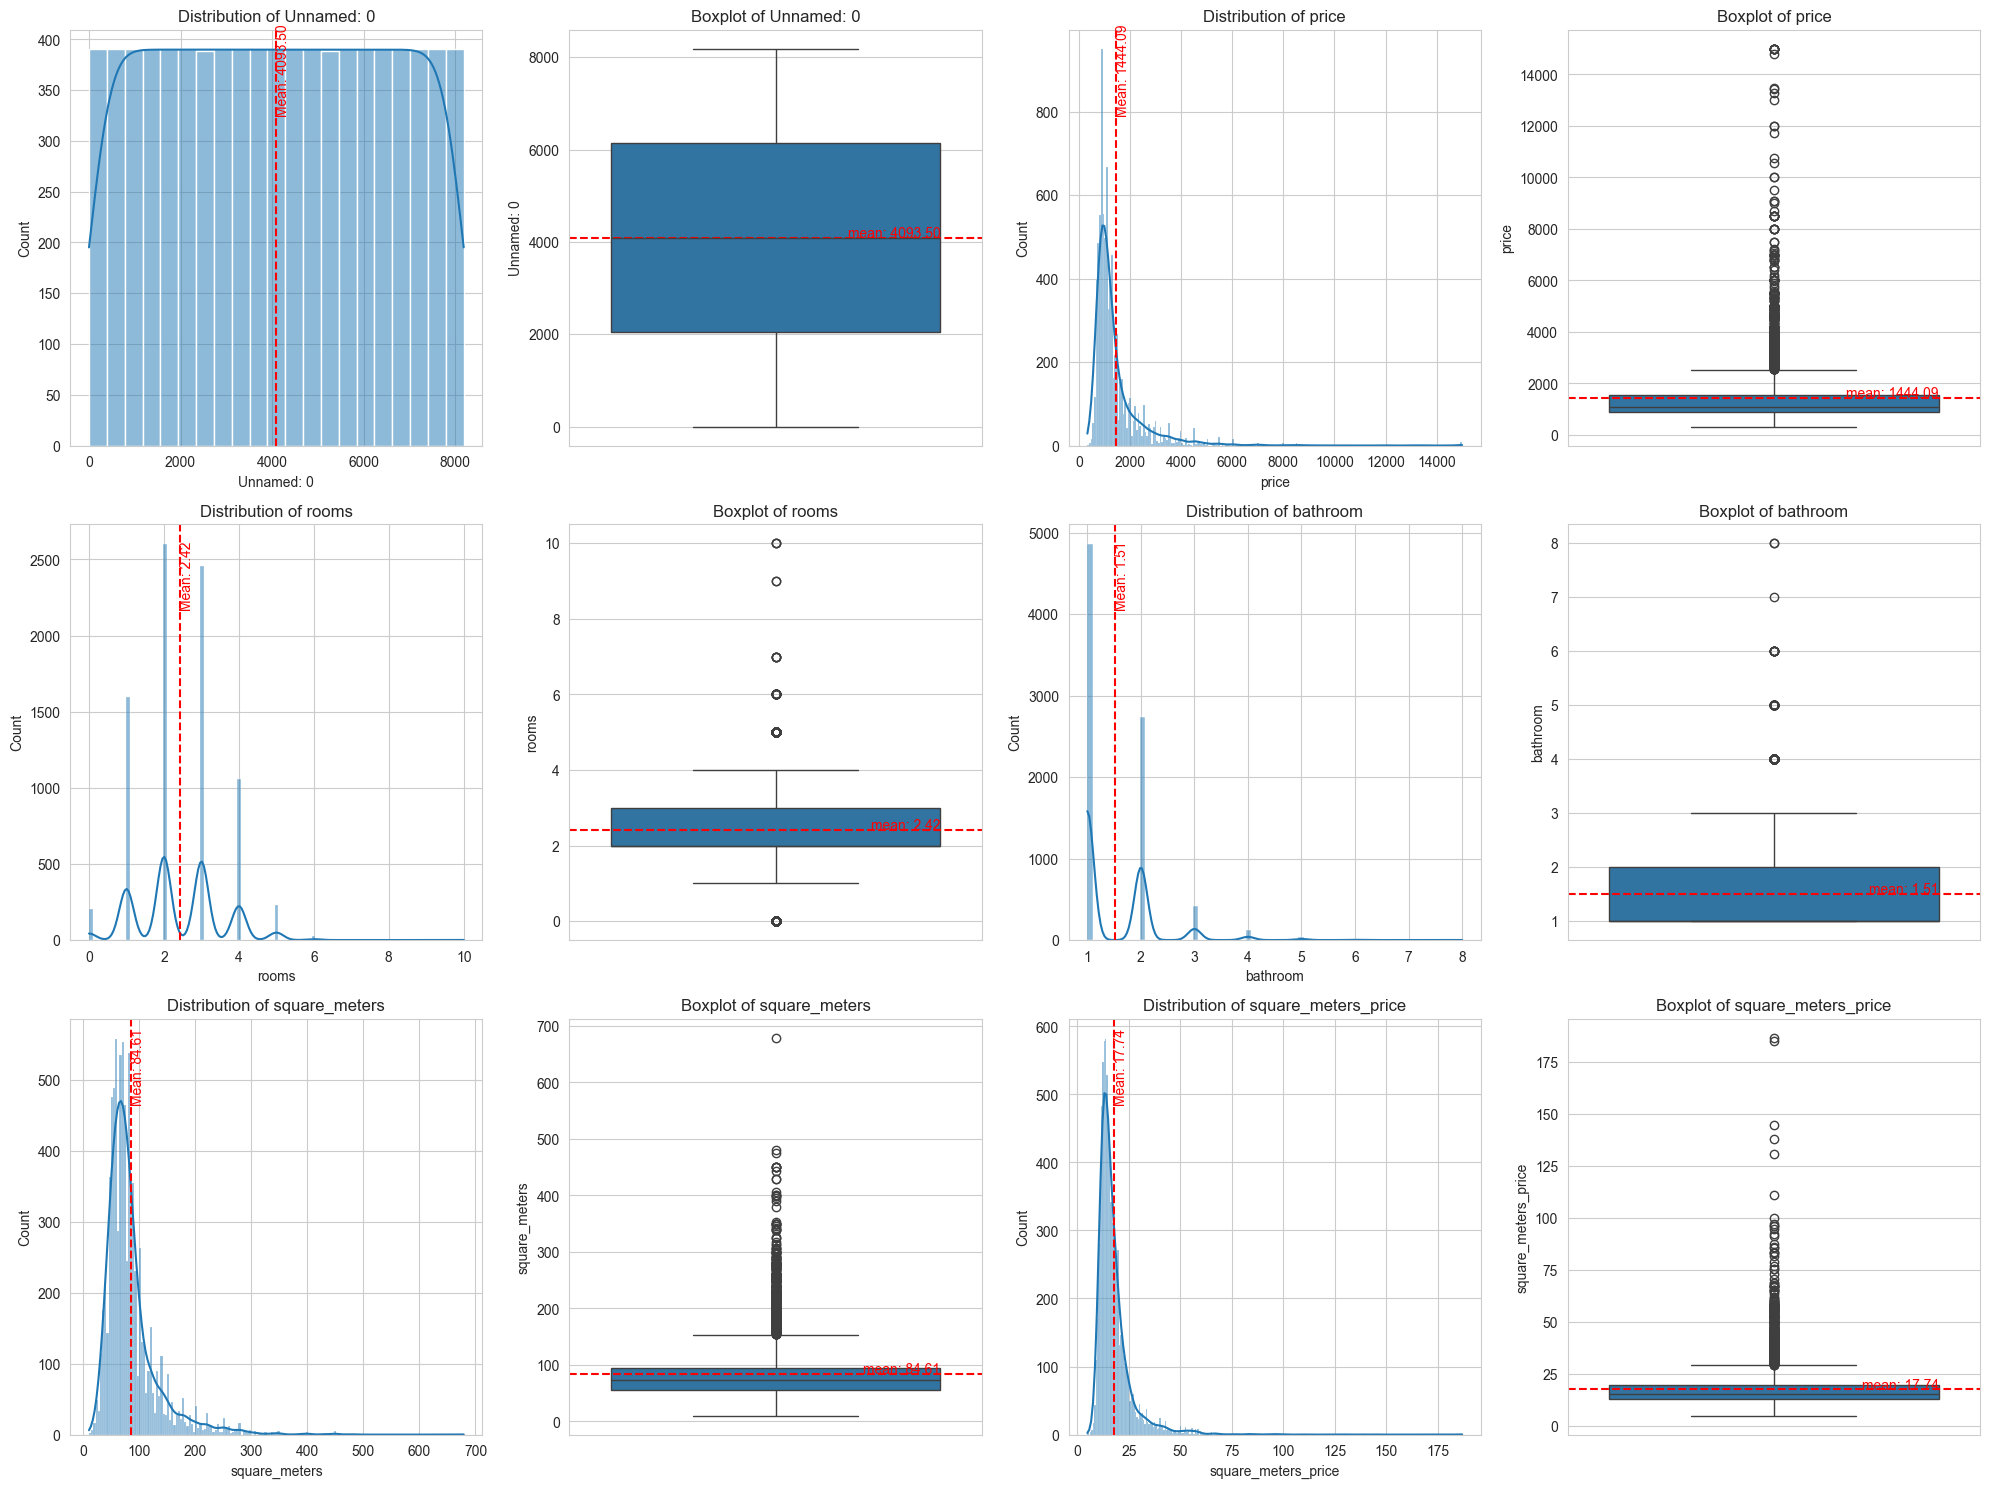

In [21]:
univariate_numerical(df)

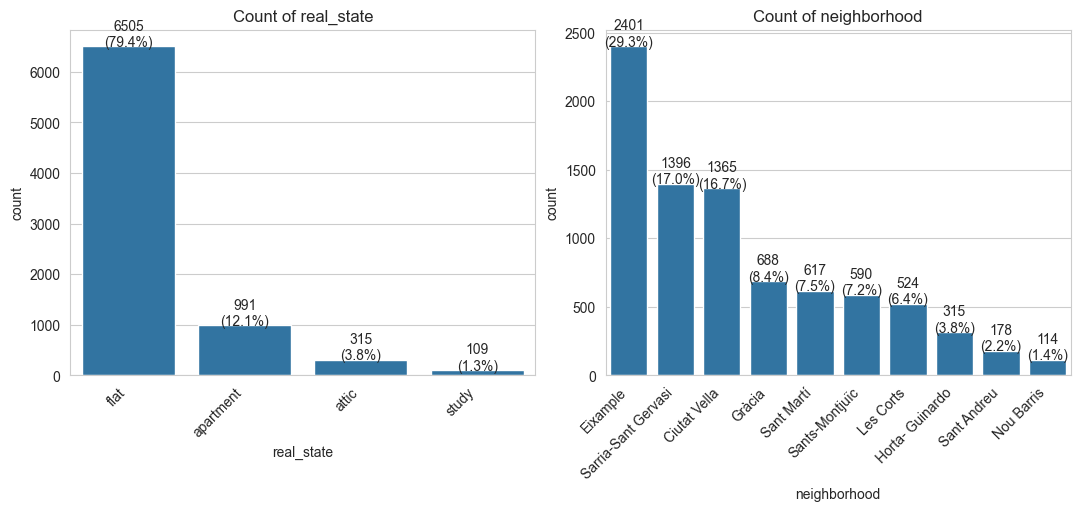

In [22]:
univariate_categorical(df);

In [23]:
df.loc[(df['real_state']=="flat")].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6505.0,4022.892083,2319.413714,0.000000,2059.0,3989.0,5943.000000,8187.0
price,6505.0,1316.758032,913.617019,320.000000,865.0,1050.0,1380.000000,15000.0
rooms,6505.0,2.541430,1.091669,0.000000,2.0,3.0,3.000000,10.0
bathroom,6505.0,1.510530,0.720411,1.000000,1.0,1.0,2.000000,8.0
square_meters,6505.0,85.514527,45.535769,11.000000,60.0,75.0,95.000000,679.0
square_meters_price,6505.0,15.755932,5.405202,5.555556,12.5,14.5,17.692308,100.0


In [24]:
df.loc[(df['neighborhood']=="Eixample")].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2401.0,4202.712620,2371.995010,12.000000,2057.0,4236.000000,6284.00,8187.0
price,2401.0,1592.147022,1150.448403,490.000000,1000.0,1225.000000,1700.00,15000.0
rooms,2401.0,2.563099,1.098994,0.000000,2.0,3.000000,3.00,9.0
bathroom,2401.0,1.583923,0.681096,1.000000,1.0,2.000000,2.00,8.0
square_meters,2401.0,87.946689,40.787208,20.000000,64.0,80.000000,100.00,350.0
square_meters_price,2401.0,19.018949,11.321671,6.741573,13.0,15.714286,20.63,144.5


## Bivariate Analysis

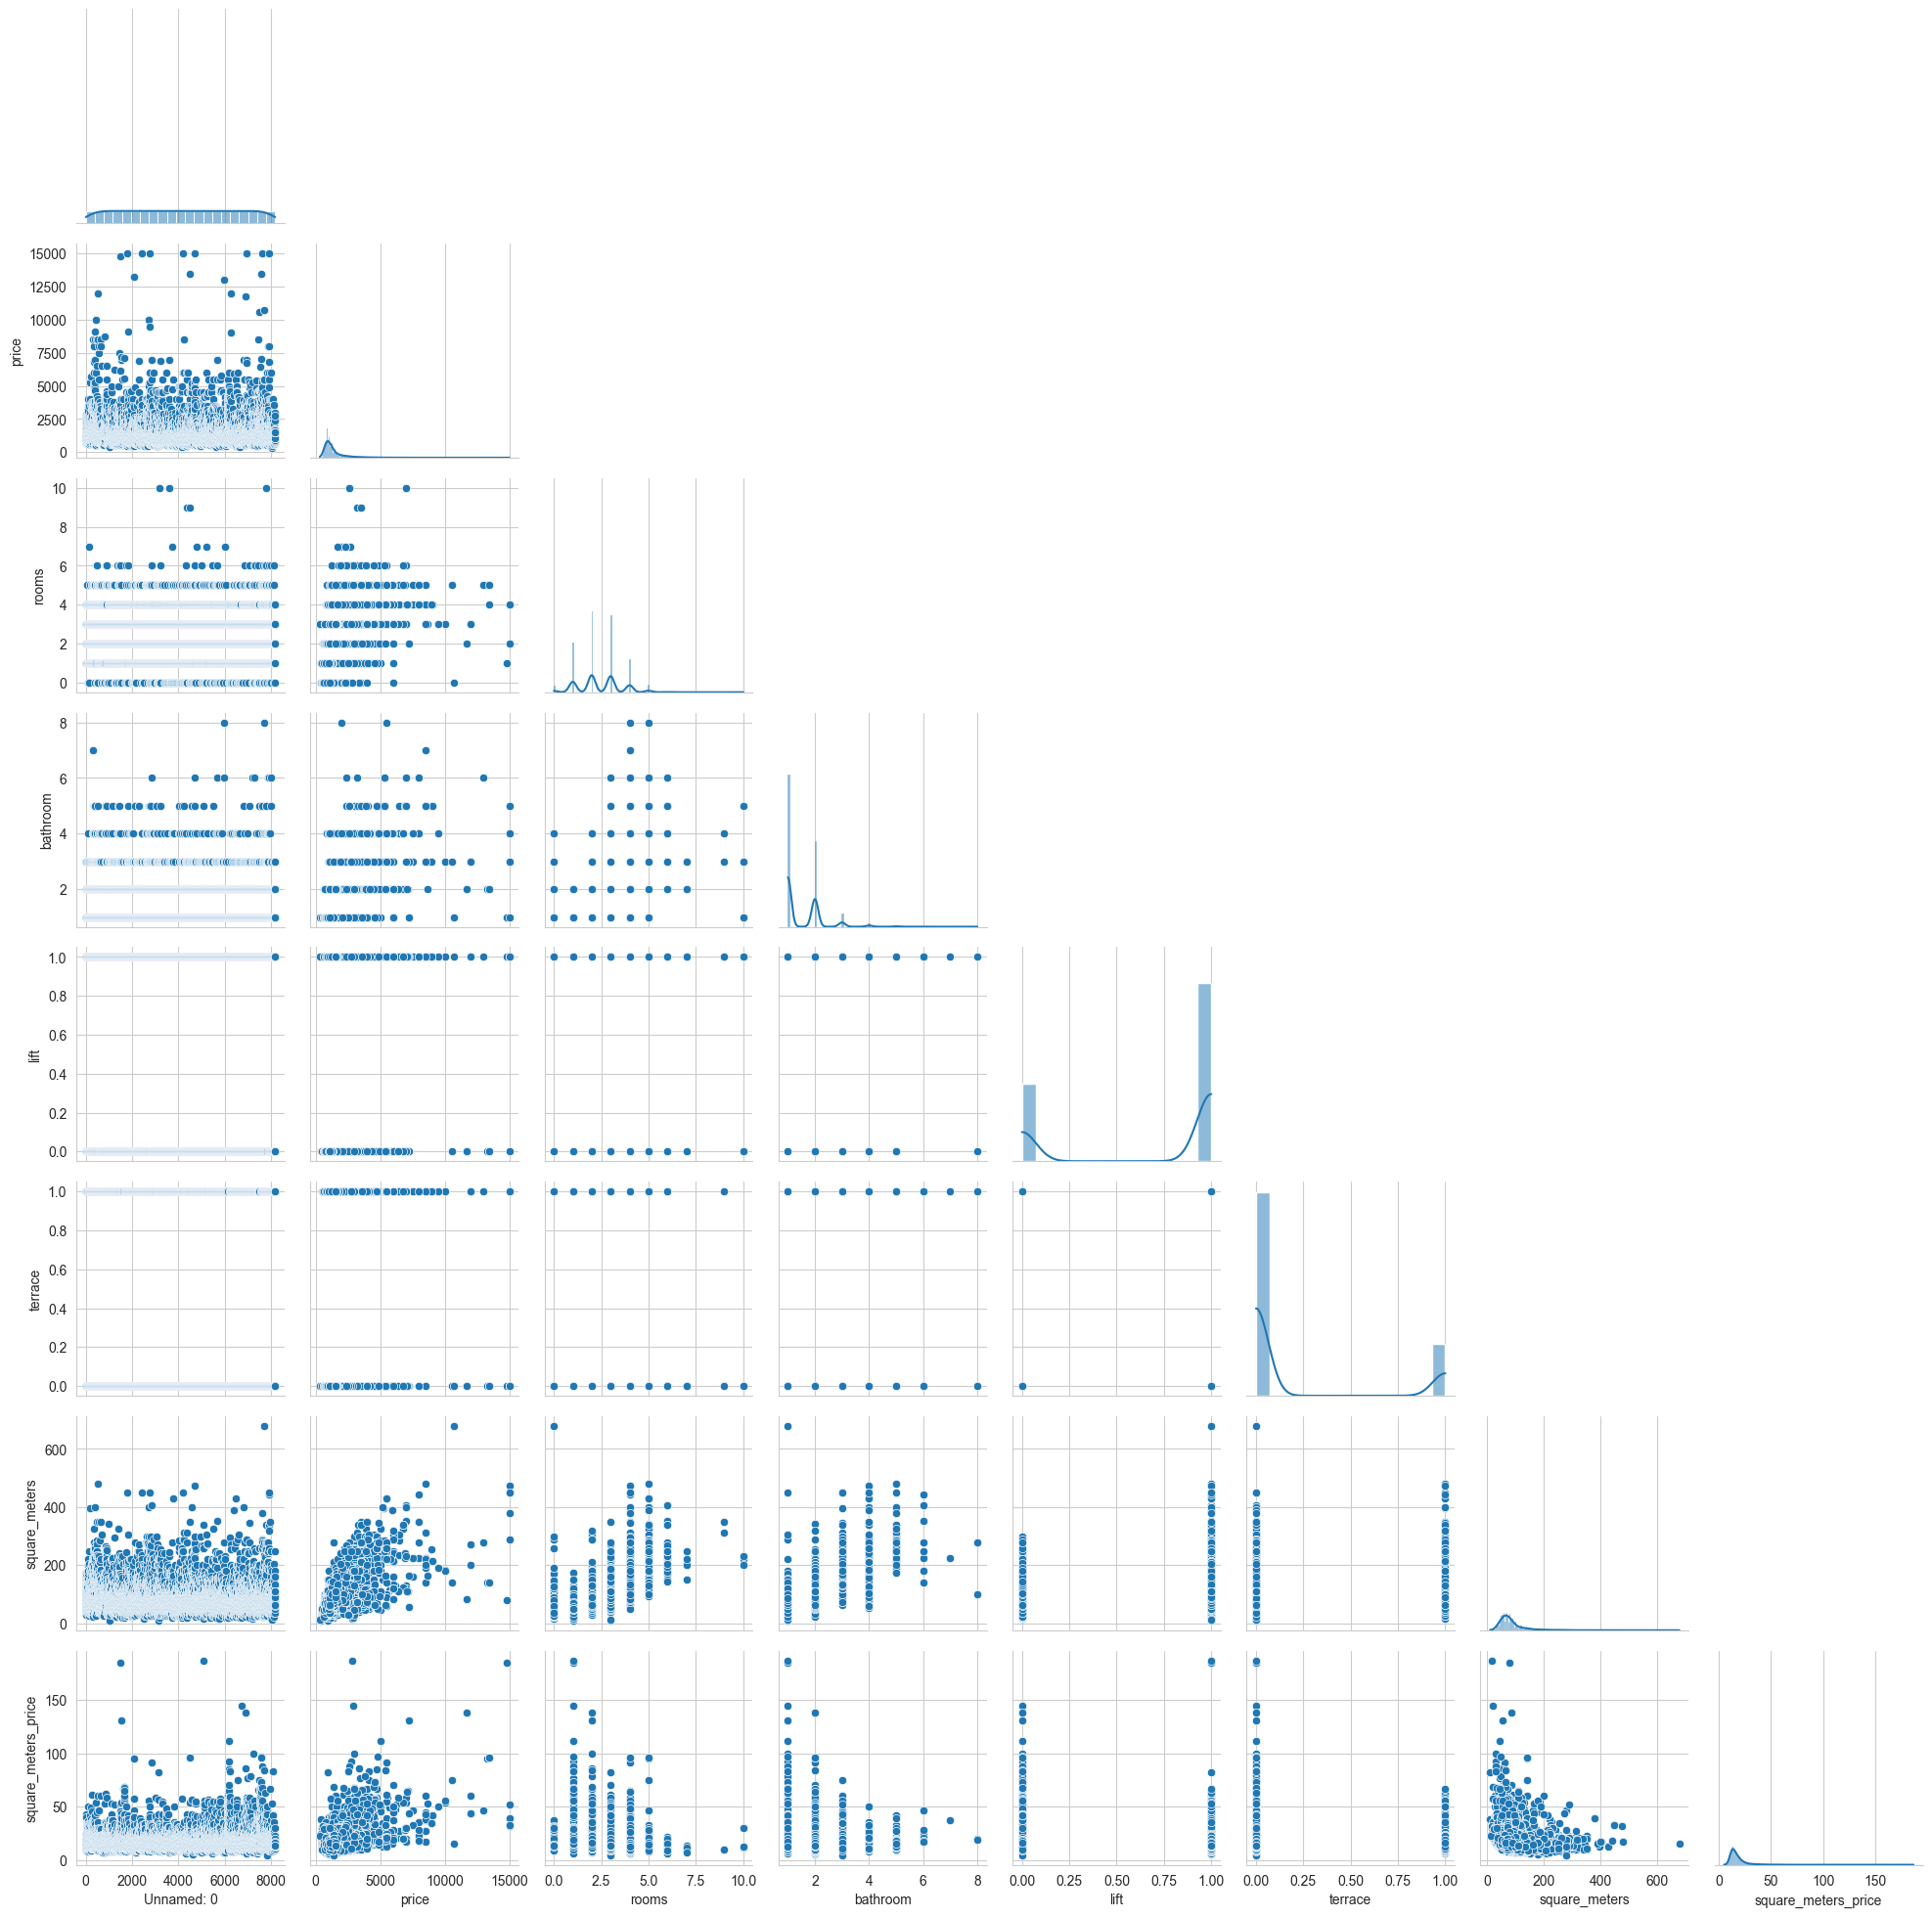

In [25]:
# Create a PairGrid
g = sns.PairGrid(df, corner=True)

# Map different plots to the grid
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot,kde=True)

# Show the plot
plt.show()

In [26]:
# Calculate correlation matrix
corr_matrix = df.select_dtypes(include=np.number).corr()

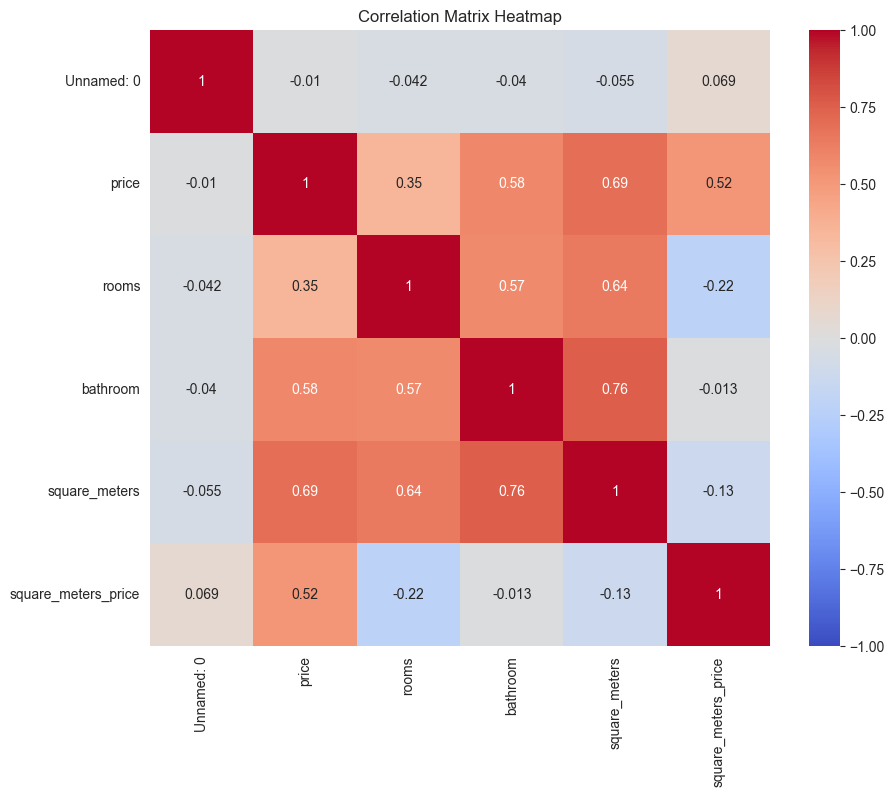

In [27]:
# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [28]:
# Display the sorted correlation table
corr_unstacked = corr_matrix.unstack() # Unstack the correlation matrix
corr_unstacked = corr_unstacked.reset_index() # Reset the index to get 'variable1' and 'variable2' as columns
corr_unstacked.columns = ['variable1', 'variable2', 'correlation']# Rename the columns for better understanding
corr_unstacked = corr_unstacked[corr_unstacked['variable1'] != corr_unstacked['variable2']] # Remove self-correlations by filtering out rows where variable1 == variable2
corr_unstacked = corr_unstacked.drop_duplicates(subset=['correlation']) # Drop duplicates to keep only one entry per variable pair
sorted_corr = corr_unstacked.sort_values(by='correlation', key=abs, ascending=False) # Sort the DataFrame by the absolute value of correlation
#sorted_corr # Display the sorted correlation table

In [29]:
# Define a function to categorize the correlation level
def categorize_correlation(correlation):
    abs_corr = abs(correlation) * 100  # Convert to percentage for easier comparison
    if abs_corr < 30:
        return 'Negligible'
    elif 30 <= abs_corr < 50:
        return 'Low'
    elif 50 <= abs_corr < 70:
        return 'Moderate'
    elif 70 <= abs_corr < 90:
        return 'High'
    else:
        return 'Very High'


In [30]:
# Apply the function to create the corr_lvl column
sorted_corr['corr_lvl'] = sorted_corr['correlation'].apply(categorize_correlation)
sorted_corr['corr_lvl'].value_counts()


corr_lvl
Negligible    8
Moderate      5
High          1
Low           1
Name: count, dtype: int64

In [31]:
sorted_corr

,variable1,variable2,correlation,corr_lvl
22,bathroom,square_meters,0.755291,High
10,price,square_meters,0.690398,Moderate
16,rooms,square_meters,0.644285,Moderate
9,price,bathroom,0.579747,Moderate
15,rooms,bathroom,0.572576,Moderate
11,price,square_meters_price,0.520627,Moderate
8,price,rooms,0.348086,Low
17,rooms,square_meters_price,-0.223946,Negligible
29,square_meters,square_meters_price,-0.128385,Negligible
5,Unnamed: 0,square_meters_price,0.069195,Negligible


In [32]:
df.columns

Index(['Unnamed: 0', 'price', 'rooms', 'bathroom', 'lift', 'terrace',
       'square_meters', 'real_state', 'neighborhood', 'square_meters_price'],
      dtype='object')

In [33]:
# check unique rooms-bathroom combinations
unique_combinations=df.groupby(['rooms', 'bathroom']).size().reset_index(name='count')
unique_combinations_sorted=unique_combinations.sort_values(by='count',ascending=False)

In [34]:
# Calculate cumulative sum of counts
unique_combinations_sorted['cum_sum'] = unique_combinations_sorted['count'].cumsum()

In [35]:
# Calculate the cumulative percentage
unique_combinations_sorted['perc'] = unique_combinations_sorted['count'] / unique_combinations_sorted['count'].sum() * 100
unique_combinations_sorted['cum_perc'] = unique_combinations_sorted['cum_sum'] / unique_combinations_sorted['count'].sum() * 100
unique_combinations_sorted.head(10)

,rooms,bathroom,count,cum_sum,perc,cum_perc
6,2,1,1836,1836,22.423058,22.423058
4,1,1,1519,3355,18.551539,40.974597
11,3,2,1207,4562,14.741085,55.715681
10,3,1,1123,5685,13.715193,69.430874
7,2,2,735,6420,8.976551,78.407426
17,4,2,641,7061,7.828530,86.235955
16,4,1,191,7252,2.332682,88.568637
0,0,1,188,7440,2.296043,90.864680
18,4,3,173,7613,2.112848,92.977528
12,3,3,111,7724,1.355642,94.333170


In [36]:
df_pop = df.merge(unique_combinations_sorted.head(10), on=['rooms', 'bathroom'])
df_pop

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price,count,cum_sum,perc,cum_perc
0,0,750,3,1,True,False,60,flat,Horta- Guinardo,12.500000,1123,5685,13.715193,69.430874
1,1,770,2,1,True,False,59,flat,Sant Andreu,13.050847,1836,1836,22.423058,22.423058
2,2,1300,1,1,True,True,30,flat,Gràcia,43.333333,1519,3355,18.551539,40.974597
3,3,2800,1,1,True,True,70,flat,Ciutat Vella,40.000000,1519,3355,18.551539,40.974597
4,4,720,2,1,True,False,44,flat,Sant Andreu,16.363636,1836,1836,22.423058,22.423058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7719,8183,1075,2,2,False,False,65,flat,Gràcia,16.538462,735,6420,8.976551,78.407426
7720,8184,1500,3,2,True,False,110,flat,Eixample,13.636364,1207,4562,14.741085,55.715681
7721,8185,1500,2,2,True,True,90,flat,Sarria-Sant Gervasi,16.666667,735,6420,8.976551,78.407426
7722,8186,1500,3,2,True,False,110,flat,Eixample,13.636364,1207,4562,14.741085,55.715681


In [37]:
print(df.shape,df_pop.shape)

(8188, 10) (7724, 14)


In [38]:
# Define the function to create and display side-by-side boxplots
def side_by_side_boxplot(df1, df2, group, var, outliers, title1, title2):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
    
    # First subplot for df1
    plt.sca(axes[0])
    boxplot_by_group(df1, group, var, outliers, title1)
    
    # Second subplot for df2
    plt.sca(axes[1])
    boxplot_by_group(df2, group, var, outliers, title2)
    
    # Show both plots after setup
    plt.show()

# Usage
#side_by_side_boxplot(df, df_pop, 'neighborhood', 'price', True, "All units (show outliers)", "Popular units (show outliers)")

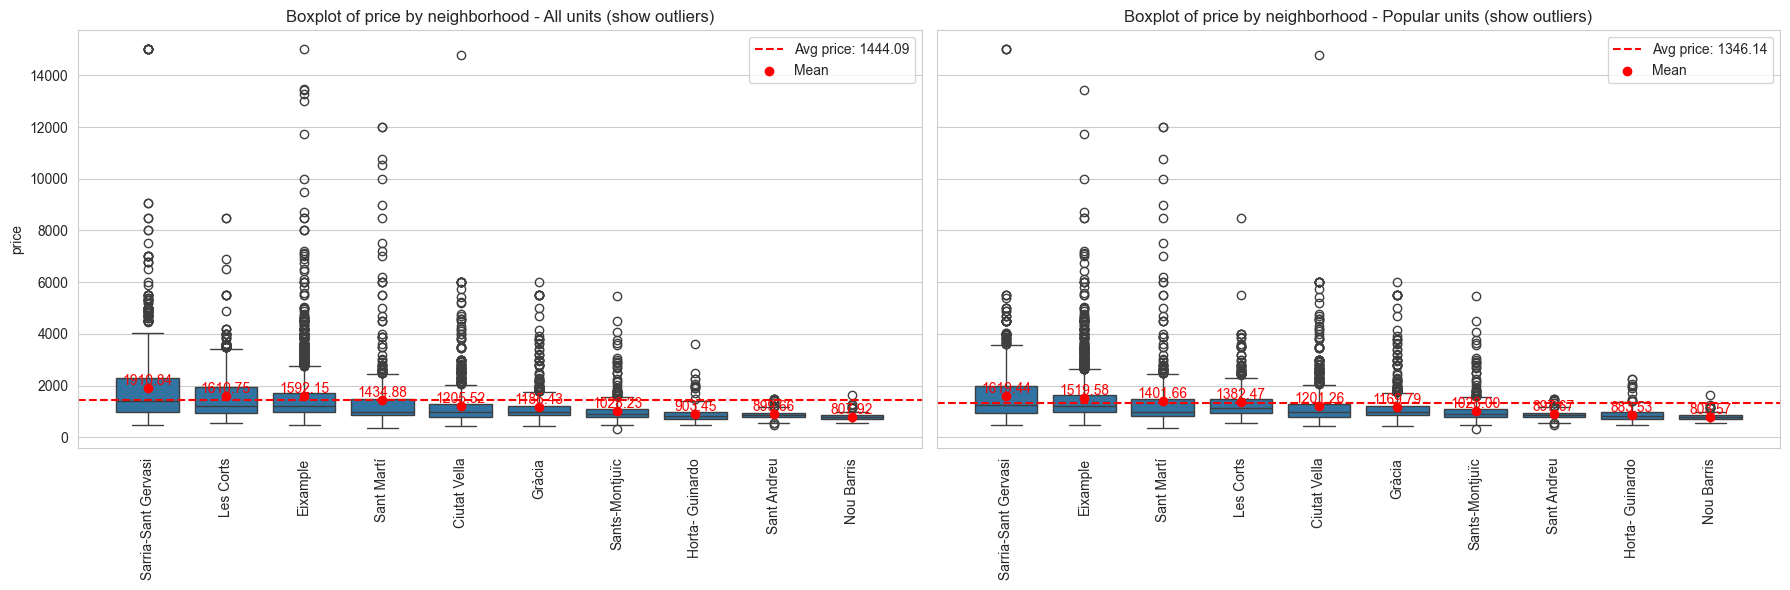

In [39]:
side_by_side_boxplot(df, df_pop, 'neighborhood', 'price', True, "All units (show outliers)", "Popular units (show outliers)")

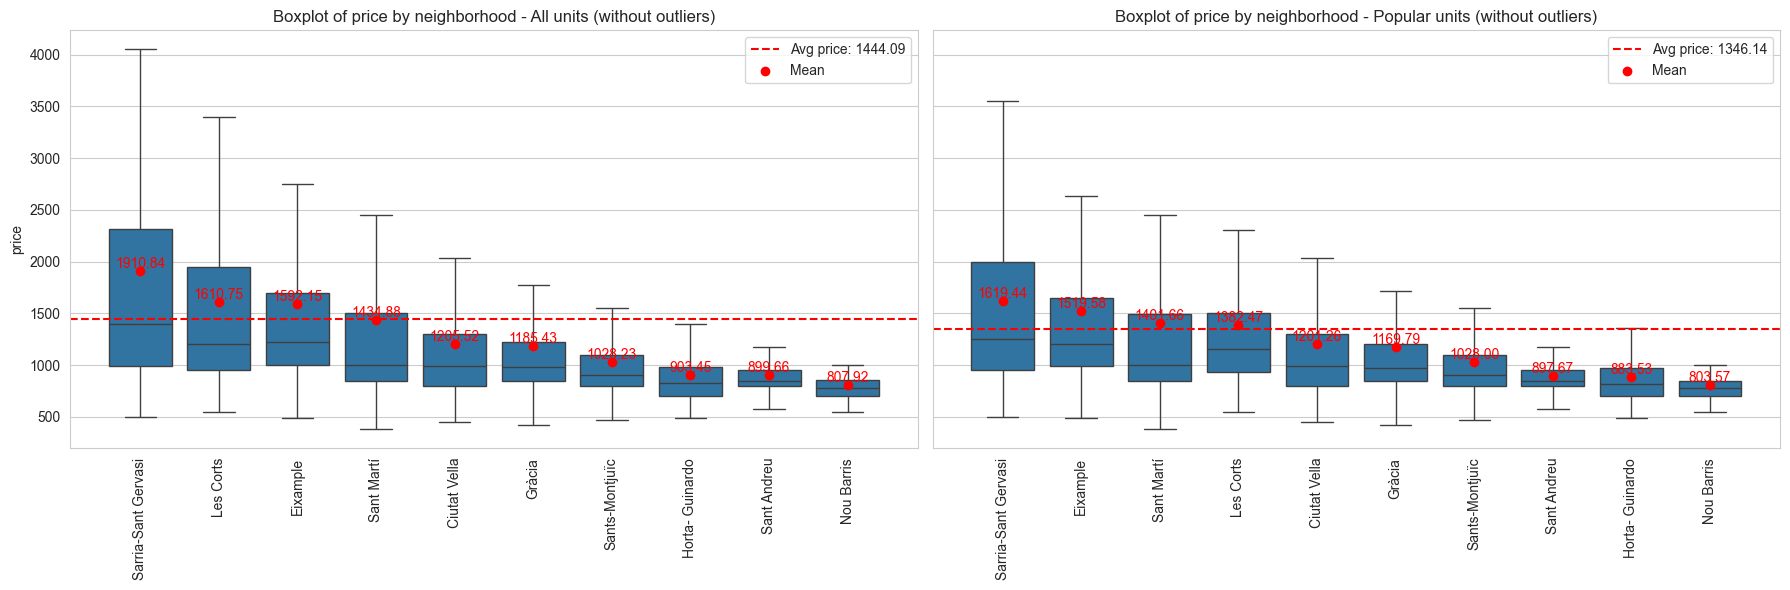

In [40]:
side_by_side_boxplot(df, df_pop, 'neighborhood', 'price', False, "All units (without outliers)", "Popular units (without outliers)")

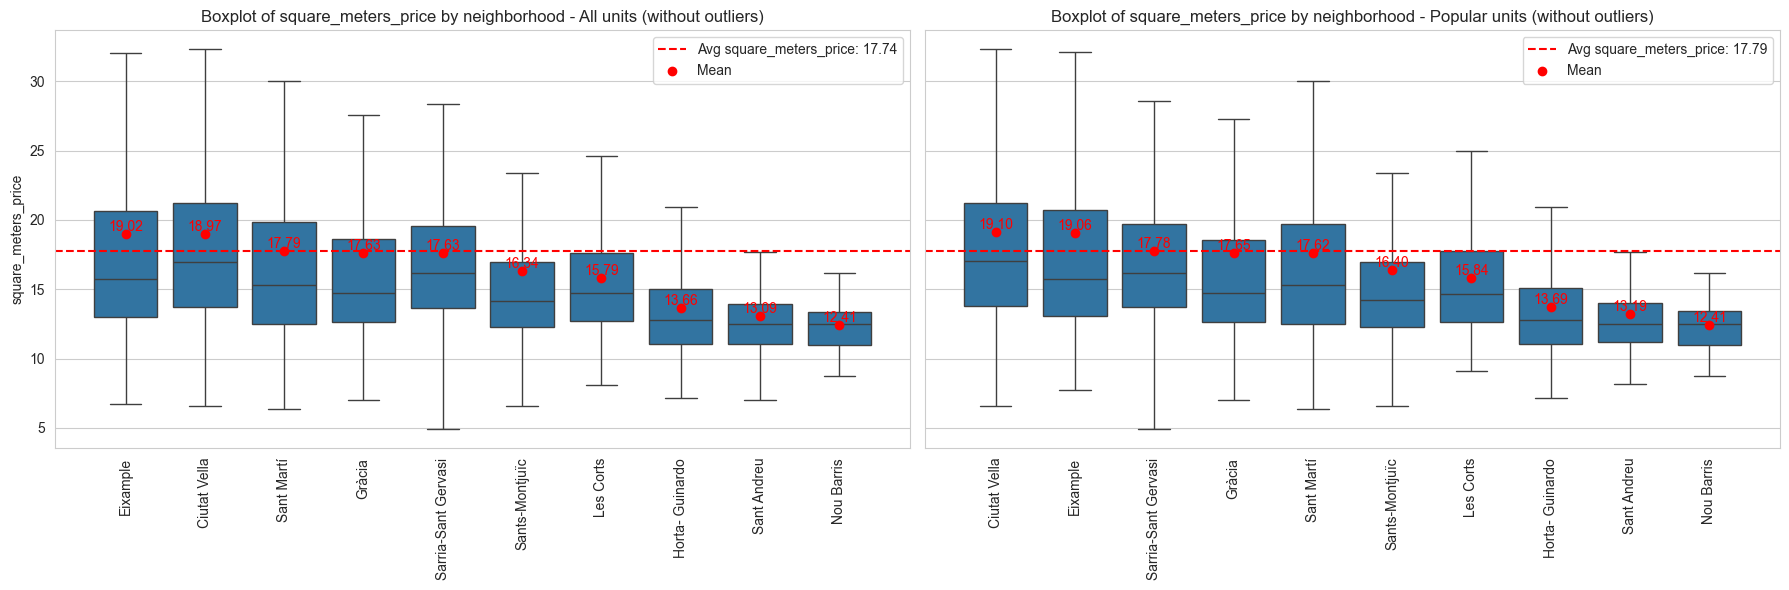

In [41]:
side_by_side_boxplot(df, df_pop, 'neighborhood', 'square_meters_price', False, "All units (without outliers)", "Popular units (without outliers)")

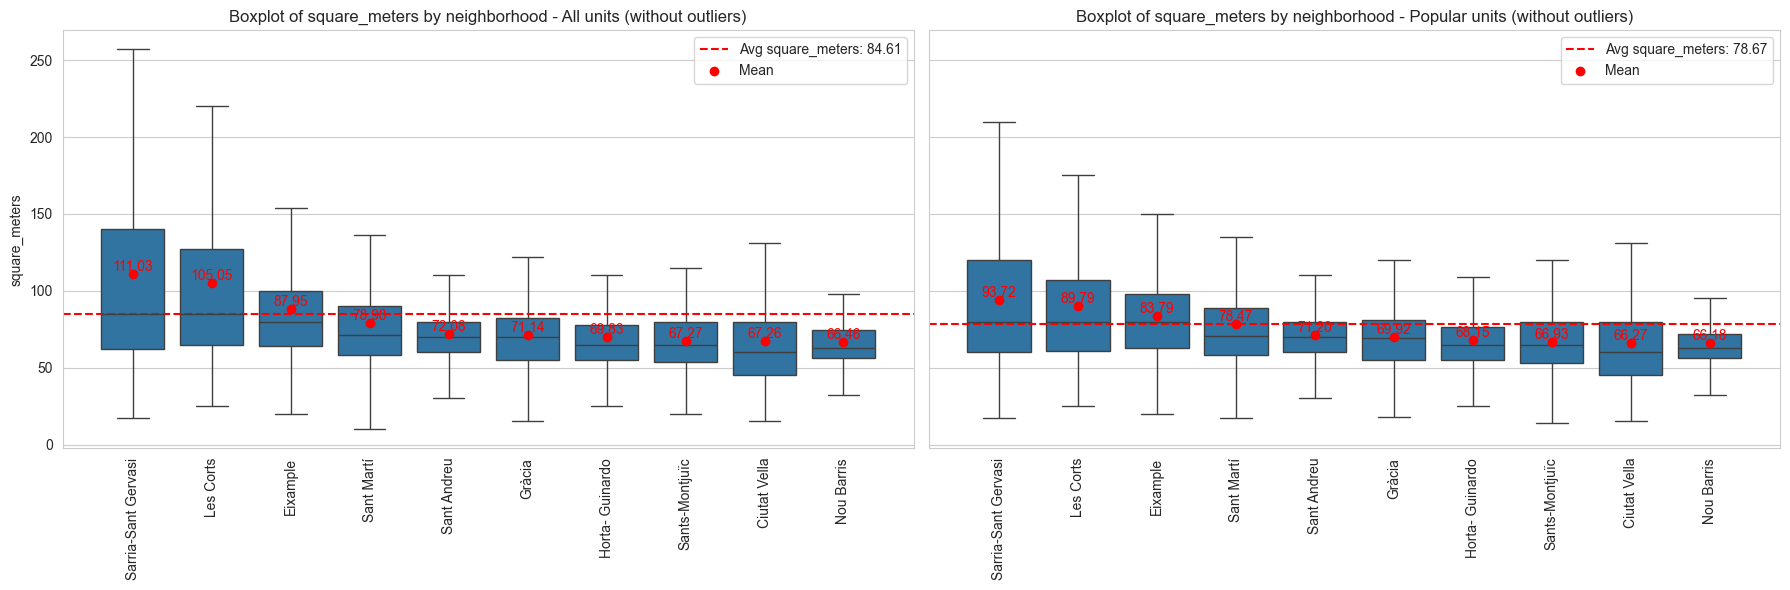

In [42]:
side_by_side_boxplot(df, df_pop, 'neighborhood', 'square_meters', False, "All units (without outliers)", "Popular units (without outliers)")

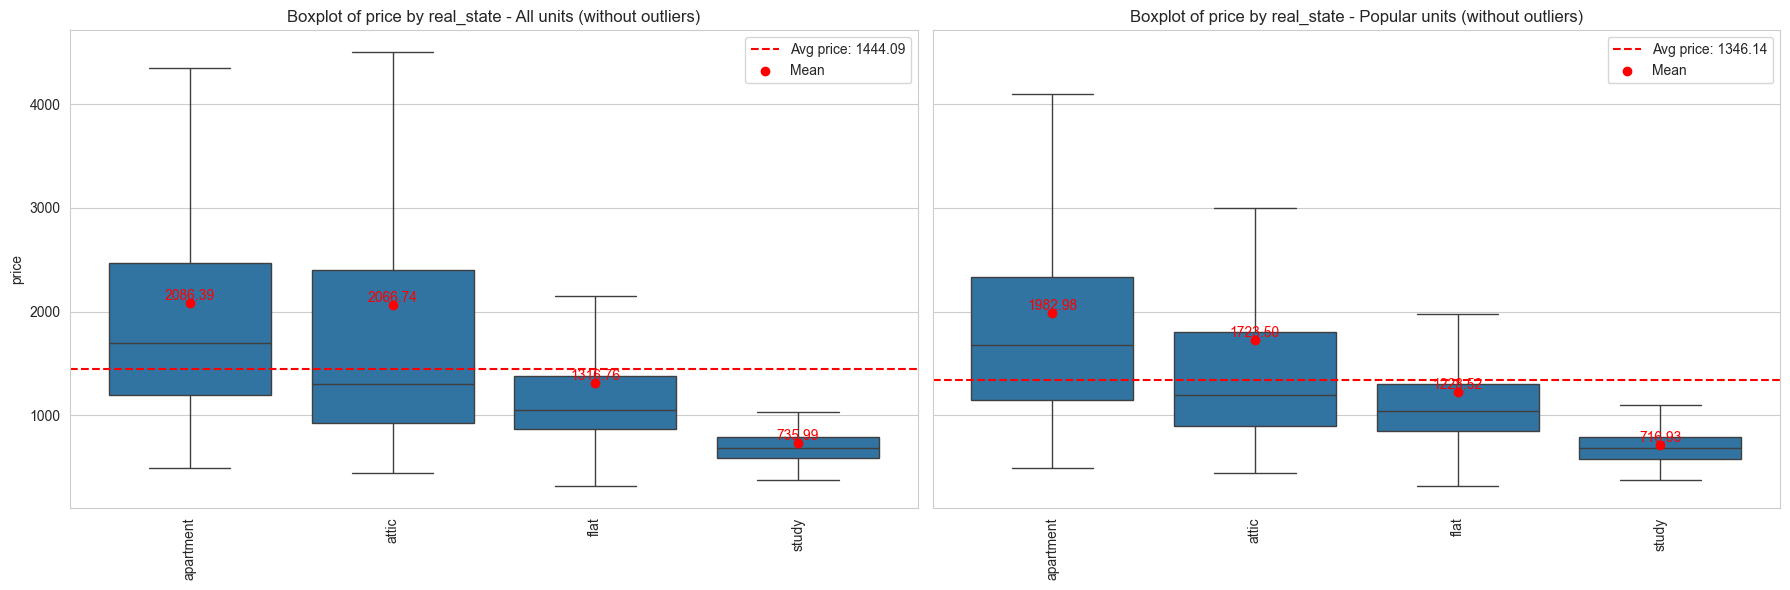

In [43]:
side_by_side_boxplot(df, df_pop, 'real_state' , 'price', False, "All units (without outliers)", "Popular units (without outliers)")

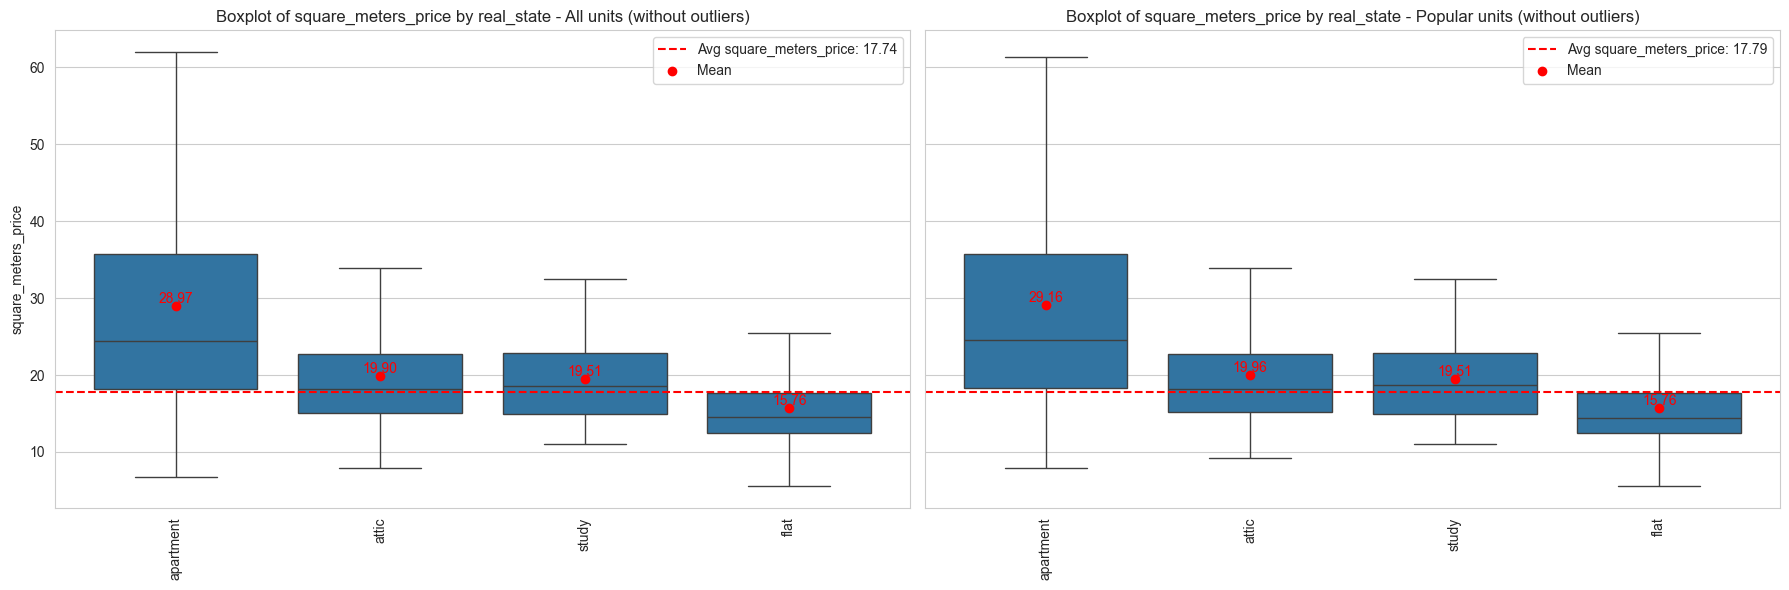

In [44]:
side_by_side_boxplot(df, df_pop, 'real_state' , 'square_meters_price', False, "All units (without outliers)", "Popular units (without outliers)")

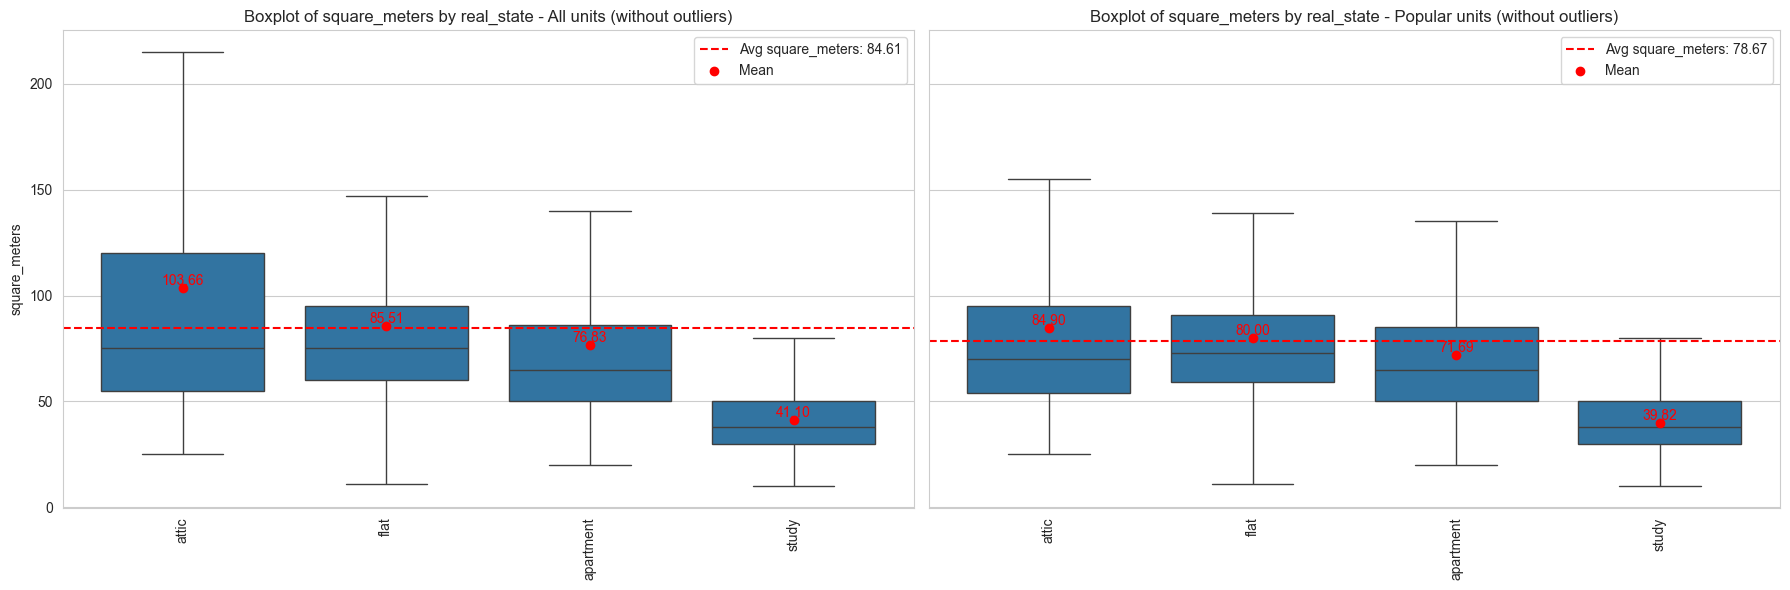

In [45]:
side_by_side_boxplot(df, df_pop, 'real_state' , 'square_meters', False, "All units (without outliers)", "Popular units (without outliers)")

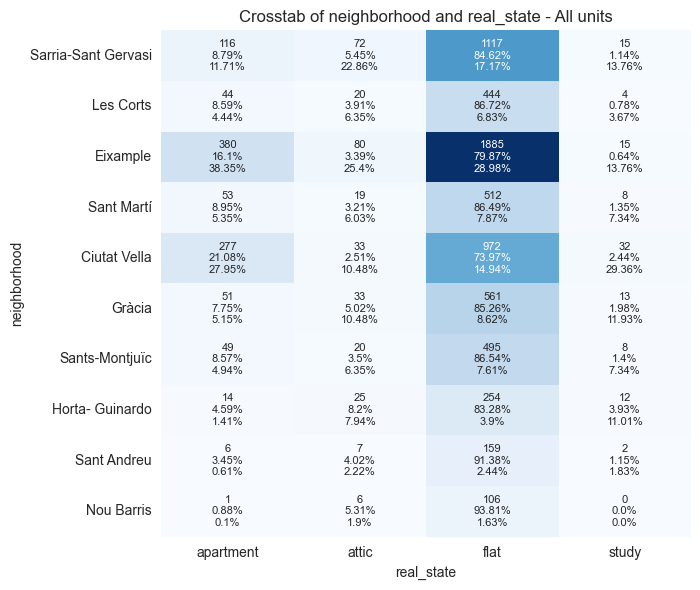

In [46]:
plot_crosstab_heat_perc(df, var_interest='real_state',df_name="All units")

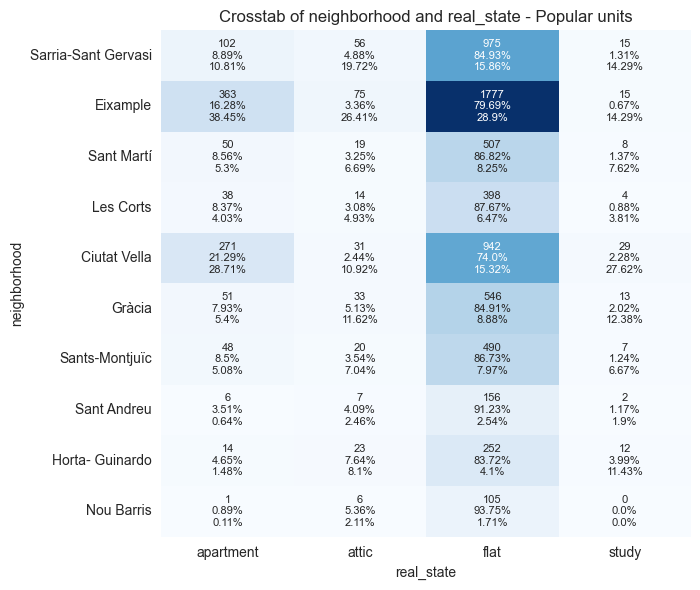

In [47]:
plot_crosstab_heat_perc(df_pop, var_interest='real_state',df_name="Popular units")

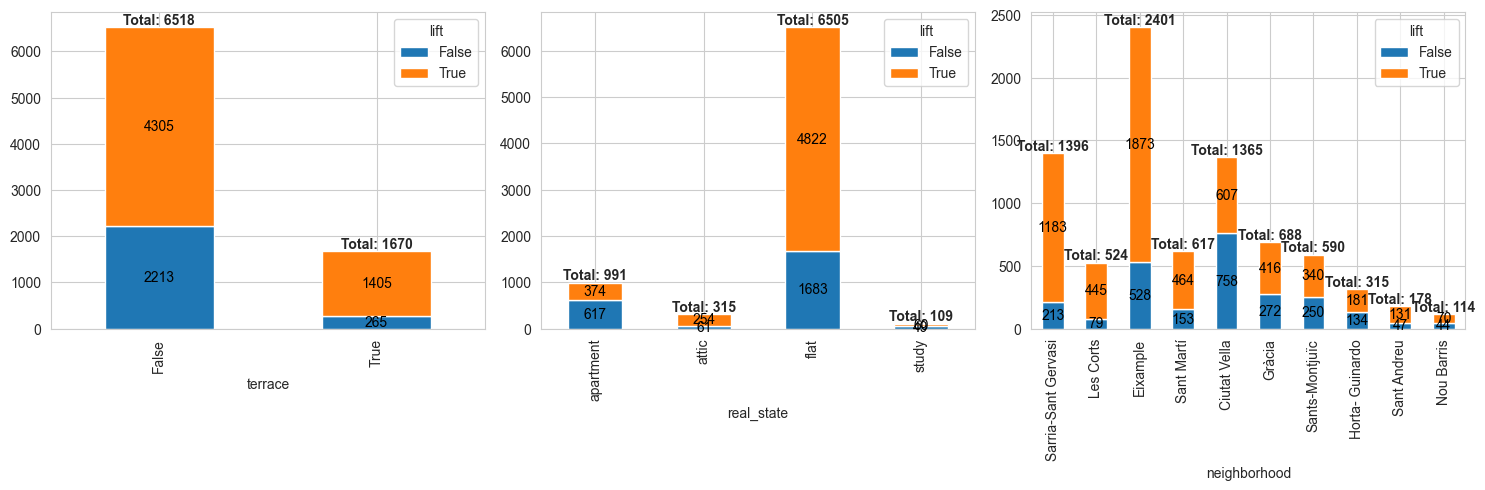

In [49]:
plot_crosstab_bar_count(df, var_interest='lift')

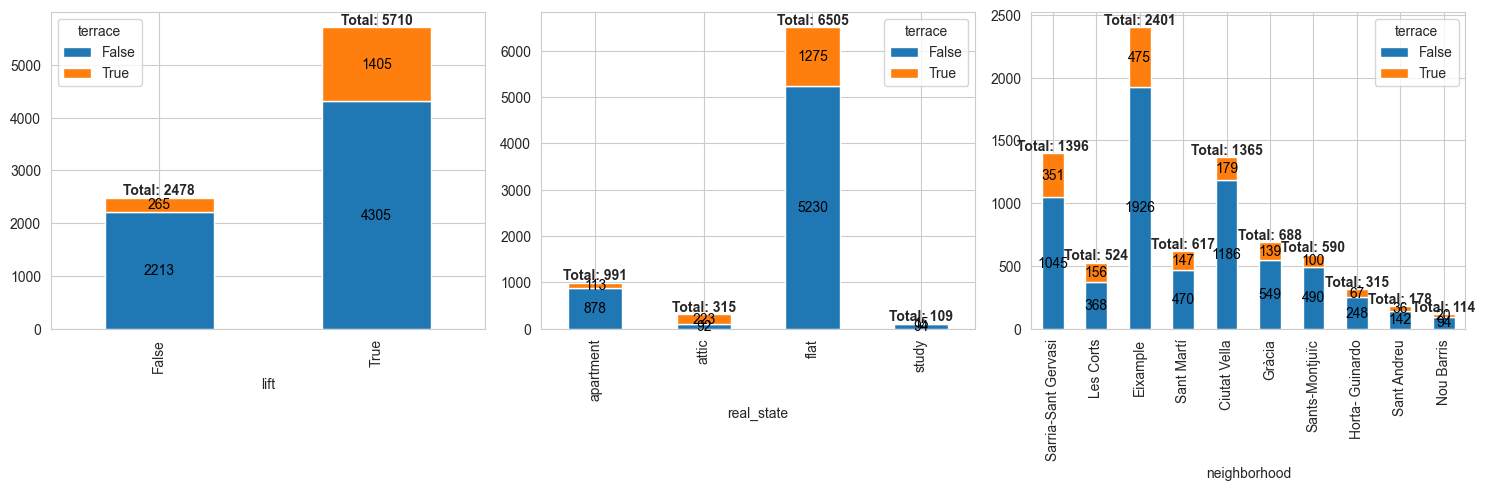

In [50]:
plot_crosstab_bar_count(df, var_interest='terrace')

# Notes on Exploratory Data Analysis



**Functions:**
- univariate_numerical(data): Function to generate two plots for each numerical variable. Histplot for variable distribution. Boxplot for statistical summary
- univariate_categorical(data): Function to generate countplot for each categorical variable. Labeled with count and percentage
- plot_crosstab_bar_count(df, var_interest): Function to create a barplot of crosstab of the variable of interest vs each of the rest of categorical variables. Labeled with counts
- plot_crosstab_heat_perc(df, var_interest): Function to create a heatmap of crosstab of the variable of interest vs each of the rest of catagorical variables. Labeled with counts, percentage by row, percentage by column
- boxplot_by_group(df, group, var, outliers): boxplot for a numerical variable of interest vs a categorical variable. with or without outliers. includes data mean and mean by category

**Univariate Analysis**
- The variables "Unnamed: 0" have a uniform distribution
- The numerical variables have a shift to the right
- The categorical variables are not balanced, with 79% of properties as "apartments" and 78% of units concentrated in 50% of the sample neighbourhoods
- 75% of the apartment units have up to 3 bedrooms and up to 2 bathrooms with an average size of 85m2.
- 75% of the units in Eixample have up to 3 bedrooms and up to 2 bathrooms with an average size of 87m2.


**Bivariate Analysis**
- 'square_meters' has a positive correlation with 'price', 'rooms' and 'bathrooms'
- 'square_meters_price' has a negative correlation with 'square_meters', 'rooms' and 'bathrooms'
- There are only one couple of variables with high correlation: bathroom-square_meters (0.75)
- The most popular unit configuration in the dataset is 2 bedrooms and 1 bathroom with 1836 units (21% of all units).
- Other popular configurations are 1-1 (18%), 3-2 (14%), 3-1 (13%), 2-2 (9%) and 4-2 (8%)
- These six most popular unit configurations represent 86% of all units
- The "df_pop" data frame includes the most popular units in terms of bedroom/bathroom configuration, representing 94% of the samples
- Sarrià-Sant Gervasi, Les Corts, Eixample and San Martí are the most expensive neighbourhoods with average prices above the dataset average.
- Sants-Montjuïc, Horta-Guinardó, Sant Andreu and Nou Barris are the cheapest neighbourhoods with average prices below the dataset average.
- When comparing the price per square metre, Ciutat Vella and Eixample are the most expensive neighbourhoods. - If we compare square meters, Ciutat Vella is the second lowest and Eixample the third
- From the perspective of price per square meter, the most attractive neighborhood according to this data could be Les Corts, with an average surface area of ​​89.79 m2 above the average (78.67 m2) and a price per square meter of 15.85 below the average (17.79)
- From the perspective of price per square meter, the most attractive type of unit according to this data could be the apartment, with an average surface area of ​​80 m2 above the average (78.67 m2) and a price per square meter of 15.76 below the average (17.79)
- There are 1,777 flats in Eixample, being the most popular unit type and neighborhood combination, with 79.68% of the units in Eixample being flats, and 28.9% of the flats are in Eixample. - In Les Courts there are only 398 flats, which makes it far from the most popular type of housing and neighbourhood combination, although 87.67% of the dwellings in Les Courts are flats, only 6.47% of the flats are in Les Courts.
- Most types of units have a lift, in the case of flats the proportion is 74.12%
- Units with a terrace on the other hand, seem to be rare and very few have one

# Data Preprocesing

- Missing value treatment
- Feature engineering
- Outlier detection and treatment
- Any other preprocessing steps

In [51]:
df2=df.copy() # Data preprocesing over a copy of original dataset

In [52]:
df2.isna().sum() # missing values per feature

Unnamed: 0               0
price                    0
rooms                    0
bathroom                 0
lift                     0
terrace                  0
square_meters            0
real_state             268
neighborhood             0
square_meters_price      0
dtype: int64

In [53]:
df2['real_state'].value_counts(dropna=False)

real_state
flat         6505
apartment     991
attic         315
NaN           268
study         109
Name: count, dtype: int64

In [54]:
# Add 'unknown' to categories
df2['real_state'] = df2['real_state'].cat.add_categories("unknown")

# Replace NaN values with 'unknown'
df2['real_state'] = df2['real_state'].fillna("unknown")


In [55]:
df2.isna().sum() # missing values per feature

Unnamed: 0             0
price                  0
rooms                  0
bathroom               0
lift                   0
terrace                0
square_meters          0
real_state             0
neighborhood           0
square_meters_price    0
dtype: int64

In [56]:
df2['real_state'].value_counts()

real_state
flat         6505
apartment     991
attic         315
unknown       268
study         109
Name: count, dtype: int64

In [57]:
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [58]:
# function to check for outliers
def count_outliers(df):
    outlier_count=0
    for column in df.select_dtypes(include=np.number).columns:
        outliers=len(df[(df[column] < df[column].quantile(0.25)-1.5*(df[column].quantile(0.75)-df[column].quantile(0.25))) | (df[column] > df[column].quantile(0.75)+1.5*(df[column].quantile(0.75)-df[column].quantile(0.25)))][column])
        print(f'{column}: {outliers} outliers ({outliers/df.shape[0]*100:.2f}%)')
        outlier_count+= outliers
    return outlier_count

In [59]:
count_outliers(df2)

price: 807 outliers (9.86%)
rooms: 474 outliers (5.79%)
bathroom: 174 outliers (2.13%)
square_meters: 598 outliers (7.30%)
square_meters_price: 589 outliers (7.19%)


2642

In [62]:
# Calculate z-scores for only numeric columns without creating dummies
outlier_mask = (np.abs(df2.select_dtypes(include=np.number).apply(zscore)) < 3).all(axis=1)

# Filter the DataFrame based on the outlier mask and retain the original column structure
df3 = df2[outlier_mask]

In [63]:
count_outliers(df3)

price: 672 outliers (8.68%)
rooms: 318 outliers (4.11%)
bathroom: 0 outliers (0.00%)
square_meters: 438 outliers (5.66%)
square_meters_price: 449 outliers (5.80%)


1877

In [64]:
df3.shape

(7742, 9)

In [65]:
df4=df3.copy()
for column in df4.select_dtypes(include=np.number).columns:
    df4[column]=np.clip(df4[column], df4[column].quantile(0.25)-1.5*(df4[column].quantile(0.75)-df4[column].quantile(0.25)), df4[column].quantile(0.75)+1.5*(df4[column].quantile(0.75)-df4[column].quantile(0.25)))

In [66]:
count_outliers(df4)

price: 0 outliers (0.00%)
rooms: 0 outliers (0.00%)
bathroom: 0 outliers (0.00%)
square_meters: 0 outliers (0.00%)
square_meters_price: 0 outliers (0.00%)


0

In [67]:
df4.shape

(7742, 9)

In [68]:
#creating dumies
df5 = pd.get_dummies(df4, columns=['real_state','neighborhood'], drop_first=True)

In [69]:
df5.shape

(7742, 20)

In [70]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7742 entries, 0 to 8187
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         7742 non-null   int64  
 1   rooms                         7742 non-null   float64
 2   bathroom                      7742 non-null   int64  
 3   lift                          7742 non-null   bool   
 4   terrace                       7742 non-null   bool   
 5   square_meters                 7742 non-null   int64  
 6   square_meters_price           7742 non-null   float64
 7   real_state_attic              7742 non-null   bool   
 8   real_state_flat               7742 non-null   bool   
 9   real_state_study              7742 non-null   bool   
 10  real_state_unknown            7742 non-null   bool   
 11  neighborhood_Les Corts        7742 non-null   bool   
 12  neighborhood_Eixample         7742 non-null   bool   
 13  neighbor

In [71]:
# Convert boolean to numeric
cols = df5.select_dtypes(['bool'])
for i in cols.columns:
    df5[i] = df5[i].astype('int')

In [72]:
df5.head()

,price,rooms,bathroom,lift,terrace,square_meters,square_meters_price,real_state_attic,real_state_flat,real_state_study,real_state_unknown,neighborhood_Les Corts,neighborhood_Eixample,neighborhood_Sant Martí,neighborhood_Ciutat Vella,neighborhood_Gràcia,neighborhood_Sants-Montjuïc,neighborhood_Horta- Guinardo,neighborhood_Sant Andreu,neighborhood_Nou Barris
0,750,3.0,1,1,0,60,12.500000,0,1,0,0,0,0,0,0,0,0,1,0,0
1,770,2.0,1,1,0,59,13.050847,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1300,1.0,1,1,1,30,28.384073,0,1,0,0,0,0,0,0,1,0,0,0,0
3,2225,1.0,1,1,1,70,28.384073,0,1,0,0,0,0,0,1,0,0,0,0,0
4,720,2.0,1,1,0,44,16.363636,0,1,0,0,0,0,0,0,0,0,0,1,0


In [73]:
# Apply Min-Max Scaling
min_max_scaler = MinMaxScaler()
df5mm = pd.DataFrame(min_max_scaler.fit_transform(df5), columns=df5.columns)

In [74]:
df5mm.head()

,price,rooms,bathroom,lift,terrace,square_meters,square_meters_price,real_state_attic,real_state_flat,real_state_study,real_state_unknown,neighborhood_Les Corts,neighborhood_Eixample,neighborhood_Sant Martí,neighborhood_Ciutat Vella,neighborhood_Gràcia,neighborhood_Sants-Montjuïc,neighborhood_Horta- Guinardo,neighborhood_Sant Andreu,neighborhood_Nou Barris
0,0.225722,0.625,0.0,1.0,0.0,0.370370,0.304200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.236220,0.375,0.0,1.0,0.0,0.362963,0.328330,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.514436,0.125,0.0,1.0,1.0,0.148148,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.000000,0.125,0.0,1.0,1.0,0.444444,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.209974,0.375,0.0,1.0,0.0,0.251852,0.473446,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [75]:
data=df5mm.copy()

# Notes on Data Preprocesing


- Preprocessed data on a copy of the original dataset named df2
- Created a new category "unknown" in the variable 'real_state' replacing NaN
- Removed the variable "Unnamed: 0" which had no value for modeling
- There are outliers in all variables. df2.shape:(8188, 9)
- Applied the Z-score method, which removes outliers with more than 3 standard deviations. Some variables with a relevant percentage of outliers still remain. df3.shape:(7742, 9)
- Limited outliers to respective whisker boundaries. df4.shape:(7742, 9)
- Created dummy variables for variables 'real_state' and 'neighborhood'. df5.shape:(7742, 20)
- Boolean variables were converted to numeric
- Min-Max scaling was applied. The dataset has features with different scales, normalization ensures that no feature dominates the learning process.

# EDA (pre-modeling)

In [79]:
data.shape

(7742, 20)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7742 entries, 0 to 7741
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         7742 non-null   float64
 1   rooms                         7742 non-null   float64
 2   bathroom                      7742 non-null   float64
 3   lift                          7742 non-null   float64
 4   terrace                       7742 non-null   float64
 5   square_meters                 7742 non-null   float64
 6   square_meters_price           7742 non-null   float64
 7   real_state_attic              7742 non-null   float64
 8   real_state_flat               7742 non-null   float64
 9   real_state_study              7742 non-null   float64
 10  real_state_unknown            7742 non-null   float64
 11  neighborhood_Les Corts        7742 non-null   float64
 12  neighborhood_Eixample         7742 non-null   float64
 13  nei

In [81]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,7742.0,0.466409,0.245353,0.0,0.278215,0.398950,0.566929,1.0
rooms,7742.0,0.463866,0.253707,0.0,0.375000,0.375000,0.625000,1.0
bathroom,7742.0,0.212542,0.286864,0.0,0.000000,0.000000,0.500000,1.0
lift,7742.0,0.696461,0.459816,0.0,0.000000,1.000000,1.000000,1.0
terrace,7742.0,0.193878,0.395360,0.0,0.000000,0.000000,0.000000,1.0
square_meters,7742.0,0.497420,0.218432,0.0,0.333333,0.451852,0.600000,1.0
square_meters_price,7742.0,0.477013,0.219916,0.0,0.314887,0.417845,0.588932,1.0
real_state_attic,7742.0,0.035133,0.184128,0.0,0.000000,0.000000,0.000000,1.0
real_state_flat,7742.0,0.810385,0.392022,0.0,1.000000,1.000000,1.000000,1.0
real_state_study,7742.0,0.014079,0.117825,0.0,0.000000,0.000000,0.000000,1.0


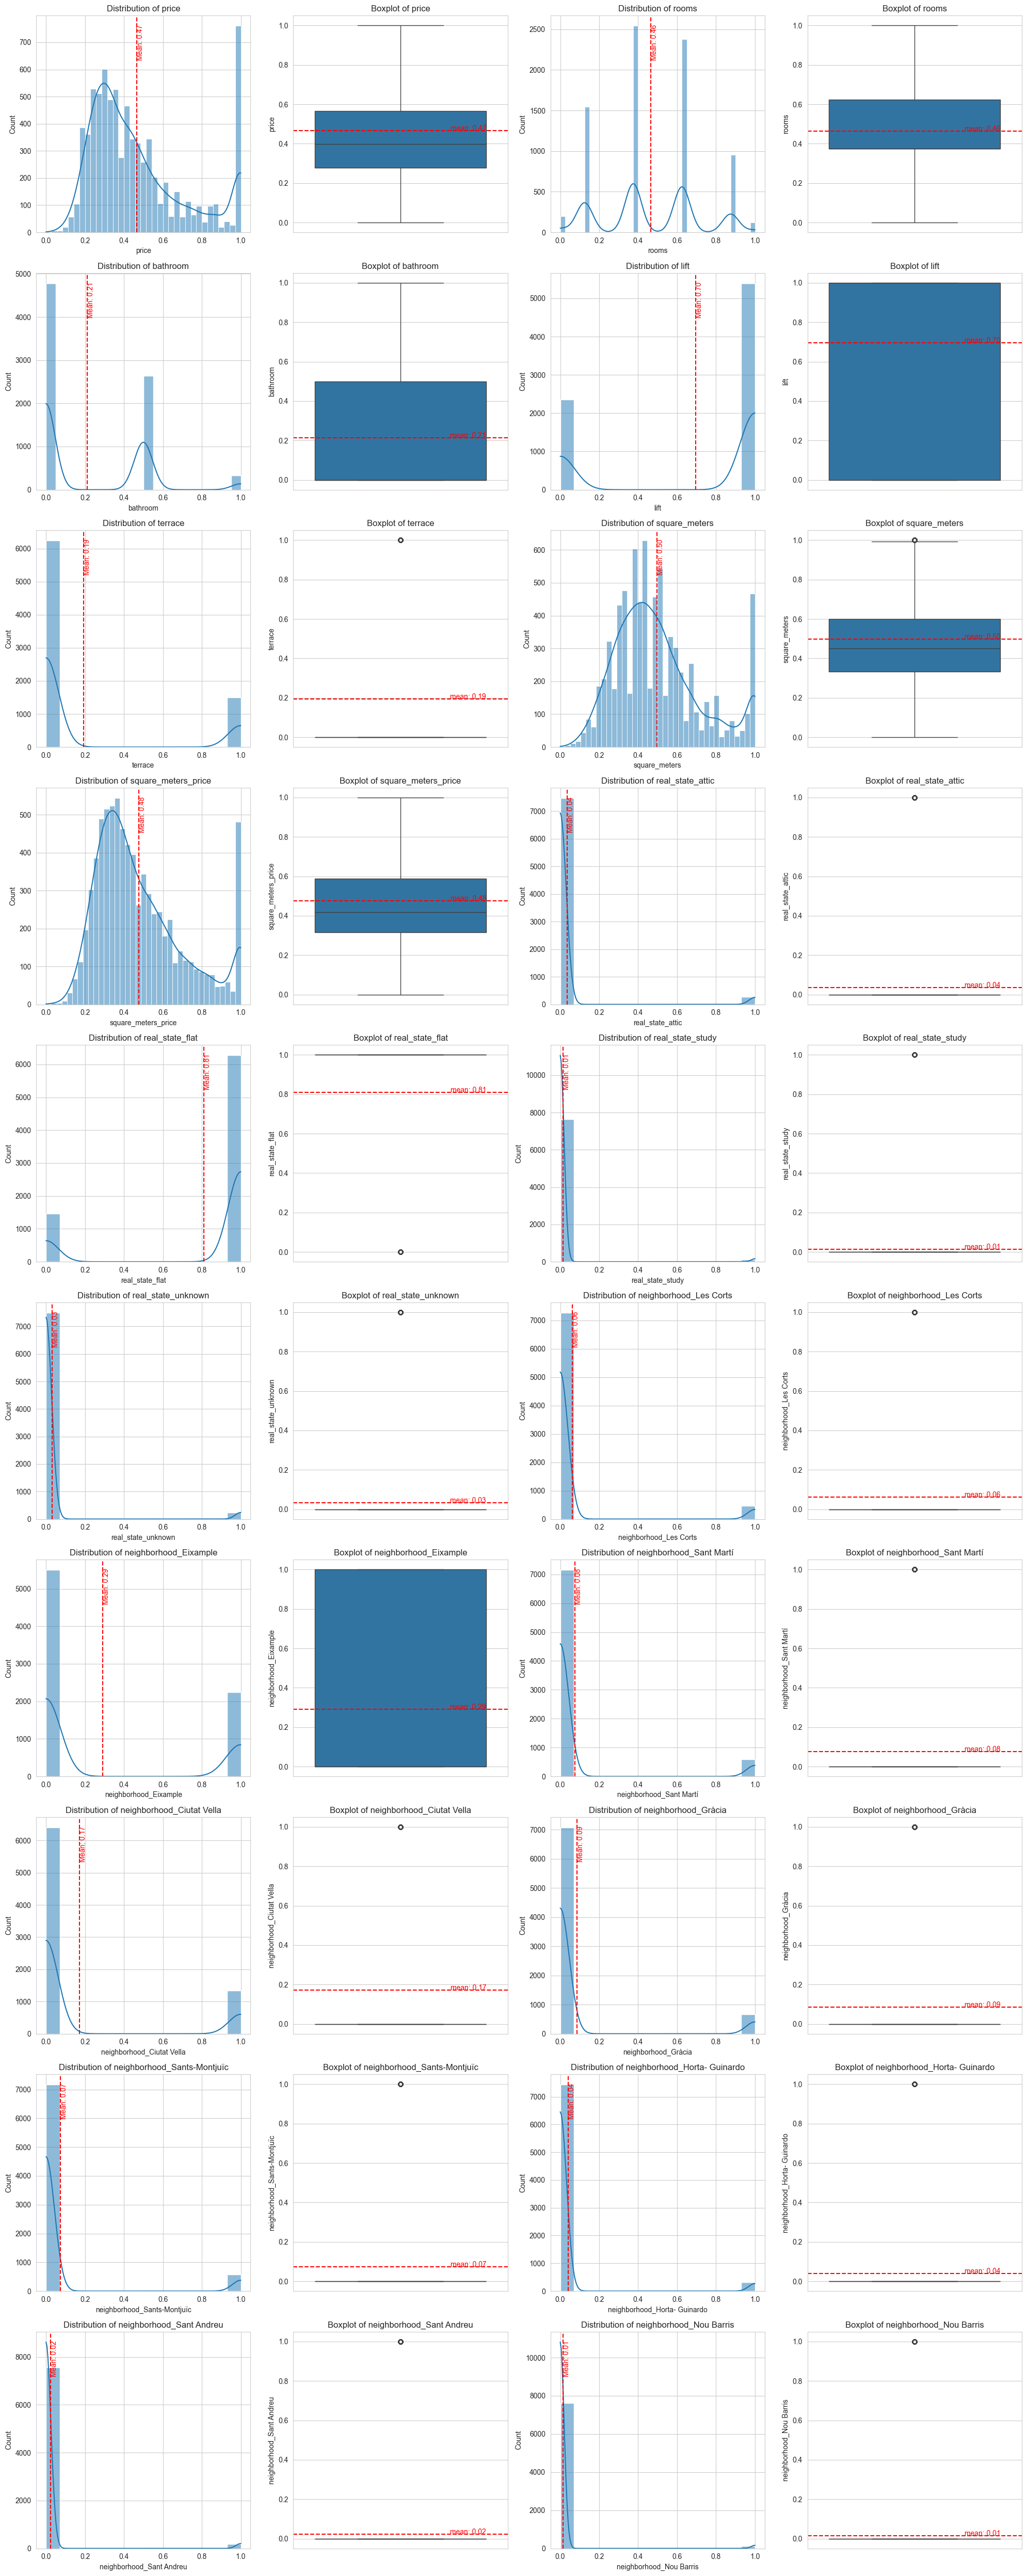

In [82]:
univariate_numerical(data)

In [83]:
# Calculate correlation matrix
corr_matrix = data.select_dtypes(include=np.number).corr()

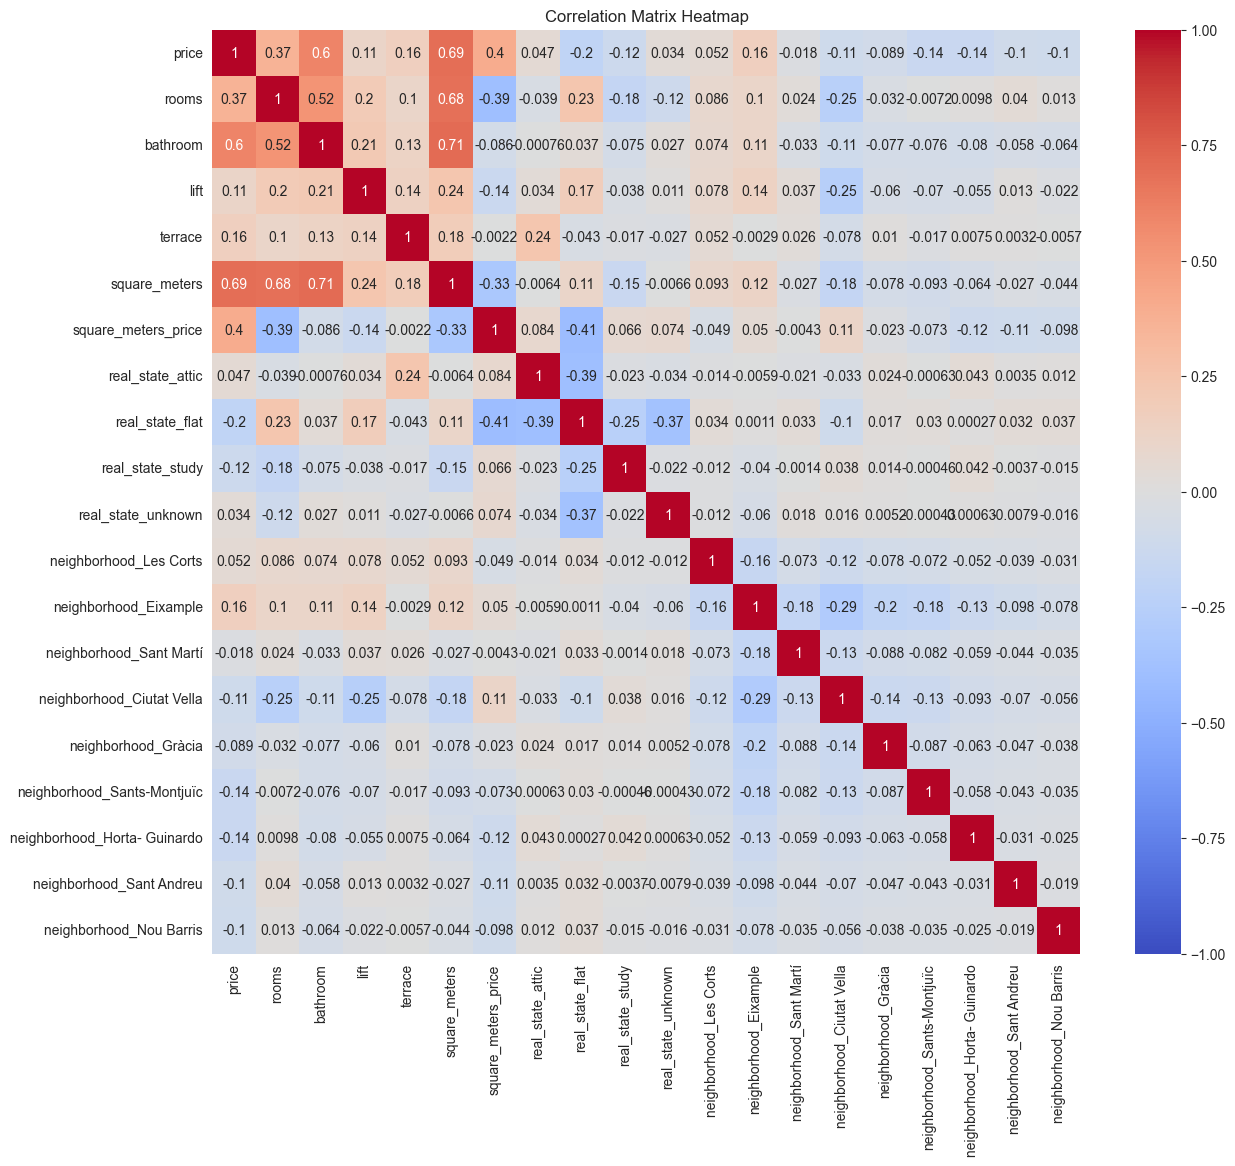

In [84]:
# Plot correlation matrix as heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [85]:
# Display the sorted correlation table
corr_unstacked = corr_matrix.unstack() # Unstack the correlation matrix
corr_unstacked = corr_unstacked.reset_index() # Reset the index to get 'variable1' and 'variable2' as columns
corr_unstacked.columns = ['variable1', 'variable2', 'correlation']# Rename the columns for better understanding
corr_unstacked = corr_unstacked[corr_unstacked['variable1'] != corr_unstacked['variable2']] # Remove self-correlations by filtering out rows where variable1 == variable2
corr_unstacked = corr_unstacked.drop_duplicates(subset=['correlation']) # Drop duplicates to keep only one entry per variable pair
sorted_corr = corr_unstacked.sort_values(by='correlation', key=abs, ascending=False) # Sort the DataFrame by the absolute value of correlation
sorted_corr # Display the sorted correlation table

,variable1,variable2,correlation
45,bathroom,square_meters,0.706826
5,price,square_meters,0.693492
25,rooms,square_meters,0.681368
2,price,bathroom,0.596550
22,rooms,bathroom,0.524990
...,...,...,...
156,real_state_attic,neighborhood_Sants-Montjuïc,-0.000633
217,real_state_unknown,neighborhood_Horta- Guinardo,0.000627
196,real_state_study,neighborhood_Sants-Montjuïc,-0.000458
216,real_state_unknown,neighborhood_Sants-Montjuïc,-0.000432


In [86]:
# Apply the function to create the corr_lvl column
sorted_corr['corr_lvl'] = sorted_corr['correlation'].apply(categorize_correlation)
sorted_corr['corr_lvl'].value_counts()

corr_lvl
Negligible    178
Low             7
Moderate        4
High            1
Name: count, dtype: int64

In [87]:
sorted_corr

,variable1,variable2,correlation,corr_lvl
45,bathroom,square_meters,0.706826,High
5,price,square_meters,0.693492,Moderate
25,rooms,square_meters,0.681368,Moderate
2,price,bathroom,0.596550,Moderate
22,rooms,bathroom,0.524990,Moderate
...,...,...,...,...
156,real_state_attic,neighborhood_Sants-Montjuïc,-0.000633,Negligible
217,real_state_unknown,neighborhood_Horta- Guinardo,0.000627,Negligible
196,real_state_study,neighborhood_Sants-Montjuïc,-0.000458,Negligible
216,real_state_unknown,neighborhood_Sants-Montjuïc,-0.000432,Negligible


# Notes on EDA (pre-modeling)

- The shape of the data for modeling (7742 , 20) does not account for outliers
- The data for modeling have no missing values ​​and all variables are numeric and scaled
- Low correlation between variables, with only a couple of variables having a high correlation (bathroom and square footage)

# Modeling

## Modeling Functions

In [116]:
# Define a function to evaluate and return the model's metrics
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    metrics = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    }
    return metrics

In [163]:
def models_regression_performance_cv_fit(models, x_train, y_train, x_test, y_test, res_df=None):
    """
    Function to compute different metrics to check regression model performance
    models: list of models to evaluate
    x_train, y_train: training set predictors and target
    x_test, y_test: validation set predictors and target
    res_df: dataframe to store performance metrics
    
    After fitting the model on the training data, the model is directly evaluated on the validation set.
    """
    
    # If results_df is not provided, create an empty dataframe
    if res_df is None:
        res_df = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score"])
        
    # Store new rows in a list
    results_list = []
    
    # Perform cross-validation on the training set
    for name, model in models:
        # K-Fold cross-validation
        kfold = KFold(n_splits=5, shuffle=True, random_state=1)
        
        # Cross-validation scores
        cv_mse = -cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv=kfold)
        cv_mae = -cross_val_score(model, x_train, y_train, scoring="neg_mean_absolute_error", cv=kfold)
        cv_r2 = cross_val_score(model, x_train, y_train, scoring="r2", cv=kfold)
        
        # Calculate mean values for each metric
        train_mse = cv_mse.mean()
        train_mae = cv_mae.mean()
        train_r2 = cv_r2.mean()

        # Add the new row with the provided metrics
        results_list.append({
            "Model": f"{name}_train", 
            "MAE": train_mae,
            "MSE": train_mse, 
            "RMSE": np.sqrt(train_mse), 
            "R2 Score": train_r2, 
        })

        # Fit model and predict on test data
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        # Calculate test metrics
        test_mae = mean_absolute_error(y_test, y_pred)
        test_mse = mean_squared_error(y_test, y_pred)
        test_r2 = r2_score(y_test, y_pred)

        # Add the new row with the provided metrics
        results_list.append({
            "Model": f"{name}_val", 
            "MAE": test_mae,
            "MSE": test_mse, 
            "RMSE": np.sqrt(test_mse), 
            "R2 Score": test_r2, 
        })
        
    # Concatenate the list of results to results_df
    res_df = pd.concat([res_df, pd.DataFrame(results_list)], ignore_index=True)
    
    return res_df

## Preparing data for modeling

In [134]:
# specifying the independent  and dependent variables
X = data.drop(["price"], axis=1)
Y = data["price"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Checking training and test sets.
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)


Shape of Training set :  (5419, 20)
Shape of test set :  (2323, 20)


## Model Building

In [135]:

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score"])

In [136]:
# Dictionary of regression models to try
regression_models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Regressor": SVR()}

In [137]:
# Loop through each model, train it, evaluate it, and store results
for model_name, model in regression_models.items():
    model.fit(x_train, y_train)
    metrics = evaluate_model(model, x_test, y_test)
    metrics["Model"] = model_name  # Add model name for reference
    results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

In [93]:
# Display the results DataFrame
results_df.sort_values(by="R2 Score", ascending=False)

,Model,MAE,MSE,RMSE,R2 Score
4,Random Forest,0.007320,0.000555,0.023556,0.990747
3,Decision Tree,0.010443,0.001023,0.031986,0.982939
6,Support Vector Regressor,0.041981,0.003182,0.056408,0.946942
0,Linear Regression,0.042237,0.004036,0.063528,0.932704
2,Ridge Regression,0.042269,0.004047,0.063616,0.932517
5,K-Nearest Neighbors,0.059409,0.009173,0.095774,0.847047
1,Lasso Regression,0.196899,0.059972,0.244891,-0.000026


In [138]:
results_df.sort_values(by="MAE")

,Model,MAE,MSE,RMSE,R2 Score
4,Random Forest,0.007229,0.000554,0.023544,0.990756
3,Decision Tree,0.010086,0.000978,0.031265,0.983700
6,Support Vector Regressor,0.041981,0.003182,0.056408,0.946942
0,Linear Regression,0.042237,0.004036,0.063528,0.932704
2,Ridge Regression,0.042269,0.004047,0.063616,0.932517
5,K-Nearest Neighbors,0.059409,0.009173,0.095774,0.847047
1,Lasso Regression,0.196899,0.059972,0.244891,-0.000026


In [139]:
results_df.sort_values(by="MSE")

,Model,MAE,MSE,RMSE,R2 Score
4,Random Forest,0.007229,0.000554,0.023544,0.990756
3,Decision Tree,0.010086,0.000978,0.031265,0.983700
6,Support Vector Regressor,0.041981,0.003182,0.056408,0.946942
0,Linear Regression,0.042237,0.004036,0.063528,0.932704
2,Ridge Regression,0.042269,0.004047,0.063616,0.932517
5,K-Nearest Neighbors,0.059409,0.009173,0.095774,0.847047
1,Lasso Regression,0.196899,0.059972,0.244891,-0.000026


In [140]:
results_df.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R2 Score
4,Random Forest,0.007229,0.000554,0.023544,0.990756
3,Decision Tree,0.010086,0.000978,0.031265,0.983700
6,Support Vector Regressor,0.041981,0.003182,0.056408,0.946942
0,Linear Regression,0.042237,0.004036,0.063528,0.932704
2,Ridge Regression,0.042269,0.004047,0.063616,0.932517
5,K-Nearest Neighbors,0.059409,0.009173,0.095774,0.847047
1,Lasso Regression,0.196899,0.059972,0.244891,-0.000026


## Model Tuning

In [98]:
# Define the model
rf = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters for Random Forest:", best_params)



Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


In [99]:
# Define the model
dt = DecisionTreeRegressor()

# Define the parameter distribution
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['mse', 'friedman_mse', 'mae']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(x_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters for Decision Tree:", best_params)


Best parameters for Decision Tree: {'min_samples_split': 5, 'max_depth': 20, 'criterion': 'friedman_mse'}


In [100]:
# Define the model
svr = SVR()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters for SVR:", best_params)


Best parameters for SVR: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [141]:
# Dictionary of regression models tuned
regression_models_tuned = {
    "Tuned Random Forest": RandomForestRegressor(max_depth= 20, min_samples_split= 5, n_estimators=200),
    "Tuned Decision Tree": DecisionTreeRegressor(min_samples_split= 5, max_depth= 20, criterion='friedman_mse'),
    "Tuned Support Vector Regressor": SVR(C= 100, gamma='scale', kernel='rbf')}

In [142]:
# Loop through each model, train it, evaluate it, and store results
for model_name, model in regression_models_tuned.items():
    model.fit(x_train, y_train)
    metrics = evaluate_model(model, x_test, y_test)
    metrics["Model"] = model_name  # Add model name for reference
    results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

In [143]:
# Display the results DataFrame
results_df.sort_values(by="R2 Score", ascending=False)

,Model,MAE,MSE,RMSE,R2 Score
7,Tuned Random Forest,0.007310,0.000539,0.023214,0.991014
4,Random Forest,0.007229,0.000554,0.023544,0.990756
8,Tuned Decision Tree,0.010762,0.000923,0.030379,0.984610
3,Decision Tree,0.010086,0.000978,0.031265,0.983700
9,Tuned Support Vector Regressor,0.040534,0.002881,0.053672,0.951964
6,Support Vector Regressor,0.041981,0.003182,0.056408,0.946942
0,Linear Regression,0.042237,0.004036,0.063528,0.932704
2,Ridge Regression,0.042269,0.004047,0.063616,0.932517
5,K-Nearest Neighbors,0.059409,0.009173,0.095774,0.847047
1,Lasso Regression,0.196899,0.059972,0.244891,-0.000026


In [144]:
results_df.sort_values(by="MAE")

,Model,MAE,MSE,RMSE,R2 Score
4,Random Forest,0.007229,0.000554,0.023544,0.990756
7,Tuned Random Forest,0.007310,0.000539,0.023214,0.991014
3,Decision Tree,0.010086,0.000978,0.031265,0.983700
8,Tuned Decision Tree,0.010762,0.000923,0.030379,0.984610
9,Tuned Support Vector Regressor,0.040534,0.002881,0.053672,0.951964
6,Support Vector Regressor,0.041981,0.003182,0.056408,0.946942
0,Linear Regression,0.042237,0.004036,0.063528,0.932704
2,Ridge Regression,0.042269,0.004047,0.063616,0.932517
5,K-Nearest Neighbors,0.059409,0.009173,0.095774,0.847047
1,Lasso Regression,0.196899,0.059972,0.244891,-0.000026


In [107]:
results_df.sort_values(by="MSE")

,Model,MAE,MSE,RMSE,R2 Score
7,Tuned Random Forest,0.007359,0.000543,0.023310,0.990939
4,Random Forest,0.007320,0.000555,0.023556,0.990747
8,Tuned Decision Tree,0.010711,0.000904,0.030062,0.984930
3,Decision Tree,0.010443,0.001023,0.031986,0.982939
9,Tuned Support Vector Regressor,0.040534,0.002881,0.053672,0.951964
6,Support Vector Regressor,0.041981,0.003182,0.056408,0.946942
0,Linear Regression,0.042237,0.004036,0.063528,0.932704
2,Ridge Regression,0.042269,0.004047,0.063616,0.932517
5,K-Nearest Neighbors,0.059409,0.009173,0.095774,0.847047
1,Lasso Regression,0.196899,0.059972,0.244891,-0.000026


In [145]:
results_df.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R2 Score
7,Tuned Random Forest,0.007310,0.000539,0.023214,0.991014
4,Random Forest,0.007229,0.000554,0.023544,0.990756
8,Tuned Decision Tree,0.010762,0.000923,0.030379,0.984610
3,Decision Tree,0.010086,0.000978,0.031265,0.983700
9,Tuned Support Vector Regressor,0.040534,0.002881,0.053672,0.951964
6,Support Vector Regressor,0.041981,0.003182,0.056408,0.946942
0,Linear Regression,0.042237,0.004036,0.063528,0.932704
2,Ridge Regression,0.042269,0.004047,0.063616,0.932517
5,K-Nearest Neighbors,0.059409,0.009173,0.095774,0.847047
1,Lasso Regression,0.196899,0.059972,0.244891,-0.000026


## Model Validation

In [146]:
# Splitting data into training, validation and test set (60-20-20)
X_temp, X_test, y_temp, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1)
print(X_train.shape, X_val.shape, X_test.shape)

(4644, 20) (1549, 20) (1549, 20)


In [147]:
# List of models to evaluate
top3models = [
    ("Tuned Random Forest", RandomForestRegressor(max_depth= 20, min_samples_split= 5, n_estimators=200)),
    ("Random Forest", RandomForestRegressor(min_samples_split=5, max_depth=20, criterion='friedman_mse', n_estimators=200)),
    ("Tuned Decision Tree", DecisionTreeRegressor(min_samples_split= 5, max_depth= 20, criterion='friedman_mse'))]

In [164]:
top3models= models_regression_performance_cv_fit(top3models, X_train, y_train, X_val, y_val,res_df)

In [166]:
top3models.sort_values(by="R2 Score", ascending=False)

,Model,MAE,MSE,RMSE,R2 Score
2,Random Forest_train,0.008110,0.000568,0.023834,0.990531
0,Tuned Random Forest_train,0.008039,0.000575,0.023973,0.990437
3,Random Forest_val,0.008067,0.000648,0.025451,0.989629
1,Tuned Random Forest_val,0.008079,0.000651,0.025518,0.989575
4,Tuned Decision Tree_train,0.011814,0.000932,0.030532,0.984505
5,Tuned Decision Tree_val,0.011862,0.001133,0.033659,0.981862


In [167]:

final_df = pd.concat([results_df, top3models], ignore_index=True)
final_df


,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,0.042237,0.004036,0.063528,0.932704
1,Lasso Regression,0.196899,0.059972,0.244891,-0.000026
2,Ridge Regression,0.042269,0.004047,0.063616,0.932517
3,Decision Tree,0.010086,0.000978,0.031265,0.983700
4,Random Forest,0.007229,0.000554,0.023544,0.990756
5,K-Nearest Neighbors,0.059409,0.009173,0.095774,0.847047
6,Support Vector Regressor,0.041981,0.003182,0.056408,0.946942
7,Tuned Random Forest,0.007310,0.000539,0.023214,0.991014
8,Tuned Decision Tree,0.010762,0.000923,0.030379,0.984610
9,Tuned Support Vector Regressor,0.040534,0.002881,0.053672,0.951964


In [168]:
# Display the results DataFrame
final_df.sort_values(by="R2 Score", ascending=False)

,Model,MAE,MSE,RMSE,R2 Score
7,Tuned Random Forest,0.007310,0.000539,0.023214,0.991014
4,Random Forest,0.007229,0.000554,0.023544,0.990756
12,Random Forest_train,0.008110,0.000568,0.023834,0.990531
10,Tuned Random Forest_train,0.008039,0.000575,0.023973,0.990437
13,Random Forest_val,0.008067,0.000648,0.025451,0.989629
11,Tuned Random Forest_val,0.008079,0.000651,0.025518,0.989575
8,Tuned Decision Tree,0.010762,0.000923,0.030379,0.984610
14,Tuned Decision Tree_train,0.011814,0.000932,0.030532,0.984505
3,Decision Tree,0.010086,0.000978,0.031265,0.983700
15,Tuned Decision Tree_val,0.011862,0.001133,0.033659,0.981862


In [169]:
final_df.sort_values(by="MAE")

,Model,MAE,MSE,RMSE,R2 Score
4,Random Forest,0.007229,0.000554,0.023544,0.990756
7,Tuned Random Forest,0.007310,0.000539,0.023214,0.991014
10,Tuned Random Forest_train,0.008039,0.000575,0.023973,0.990437
13,Random Forest_val,0.008067,0.000648,0.025451,0.989629
11,Tuned Random Forest_val,0.008079,0.000651,0.025518,0.989575
12,Random Forest_train,0.008110,0.000568,0.023834,0.990531
3,Decision Tree,0.010086,0.000978,0.031265,0.983700
8,Tuned Decision Tree,0.010762,0.000923,0.030379,0.984610
14,Tuned Decision Tree_train,0.011814,0.000932,0.030532,0.984505
15,Tuned Decision Tree_val,0.011862,0.001133,0.033659,0.981862


In [170]:
final_df.sort_values(by="MSE")

,Model,MAE,MSE,RMSE,R2 Score
7,Tuned Random Forest,0.007310,0.000539,0.023214,0.991014
4,Random Forest,0.007229,0.000554,0.023544,0.990756
12,Random Forest_train,0.008110,0.000568,0.023834,0.990531
10,Tuned Random Forest_train,0.008039,0.000575,0.023973,0.990437
13,Random Forest_val,0.008067,0.000648,0.025451,0.989629
11,Tuned Random Forest_val,0.008079,0.000651,0.025518,0.989575
8,Tuned Decision Tree,0.010762,0.000923,0.030379,0.984610
14,Tuned Decision Tree_train,0.011814,0.000932,0.030532,0.984505
3,Decision Tree,0.010086,0.000978,0.031265,0.983700
15,Tuned Decision Tree_val,0.011862,0.001133,0.033659,0.981862


In [171]:
final_df.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R2 Score
7,Tuned Random Forest,0.007310,0.000539,0.023214,0.991014
4,Random Forest,0.007229,0.000554,0.023544,0.990756
12,Random Forest_train,0.008110,0.000568,0.023834,0.990531
10,Tuned Random Forest_train,0.008039,0.000575,0.023973,0.990437
13,Random Forest_val,0.008067,0.000648,0.025451,0.989629
11,Tuned Random Forest_val,0.008079,0.000651,0.025518,0.989575
8,Tuned Decision Tree,0.010762,0.000923,0.030379,0.984610
14,Tuned Decision Tree_train,0.011814,0.000932,0.030532,0.984505
3,Decision Tree,0.010086,0.000978,0.031265,0.983700
15,Tuned Decision Tree_val,0.011862,0.001133,0.033659,0.981862


# Notes on Modeling


- Data split 70/30. Shape of Training set :  (5419, 20), Shape of test set :  (2323, 20)
- Performance Metrics:
    - MAE (Mean Absolute Error): Measures the average magnitude of errors in a set of predictions, without considering their direction.
    - MSE (Mean Squared Error): Measures the average of the squares of the errors, giving more weight to larger errors.
    - RMSE (Root Mean Squared Error): The square root of MSE, providing error in the same units as the target variable.
    - R2 Score (Coefficient of Determination): Indicates how well the model's predictions approximate the real data points. A value closer to 1 indicates a better fit.
- **Random Forest**: Best Performance. It has the lowest MAE (0.007370), MSE (0.000556), and RMSE (0.023589), and the highest R2 Score (0.990722), indicating it is the most accurate model among the ones tested.
- **Decision Tree**: Second Best. It also performs very well with low MAE (0.010382), MSE (0.001028), and RMSE (0.032058), and a high R2 Score (0.982863).
- **Support Vector Regressor (SVR)**: Good Performance. It has a relatively low MAE (0.041981), MSE (0.003182), and RMSE (0.056408), with a high R2 Score (0.946942).
- Linear Regression and Ridge Regression: Similar Performance. Both have similar metrics with MAE around 0.042, MSE around 0.004, RMSE around 0.063, and R2 Score around 0.93, indicating decent performance.
- K-Nearest Neighbors (KNN): Moderate Performance. It has higher MAE (0.059409), MSE (0.009173), and RMSE (0.095774), with a lower R2 Score (0.847047), indicating it is less accurate compared to the top models.
- Lasso Regression: Poor Performance: It has the highest MAE (0.196899), MSE (0.059972), and RMSE (0.244891), with a negative R2 Score (-0.000026), indicating it performs poorly on this dataset.
- The three best performing models were selected for model tuning: Random Forest, Decision Tree, and Support Vector Regression.
- After hyperparameter tuning, **Tuned Random Forest**, **Random Forest**, and **Tuned Decision Tree** are the best performing models
- The 3 best performing models after hyperparameter tuning will be evaluated with CrossValidation
- 60-20-20 data split for training-validation-testing
- After CrossValidation, **Tuned Random Forest** turns out to be **the best performing model**

# Final Model

In [172]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Define the model with the selected hyperparameters
RandomForestTuned = RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=200, random_state=1)

# Train the model on the entire training dataset
RandomForestTuned.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = RandomForestTuned.predict(X_test)

In [175]:
evaluate_model(RandomForestTuned, X_test, y_test)

{'MAE': np.float64(0.006795284586200886),
 'MSE': np.float64(0.0005245718666010765),
 'RMSE': np.float64(0.02290353393258509),
 'R2 Score': 0.9910983426526229}

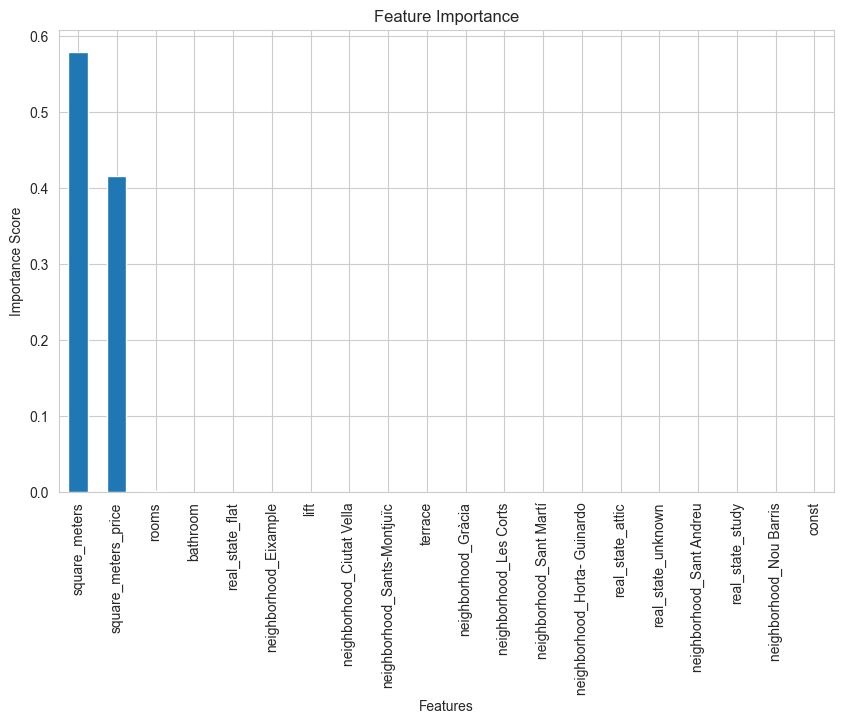

In [176]:
# Feature importance
feature_importances = pd.Series(RandomForestTuned.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


# Conclusions

- square_meters is the most important variable to predict unit price
- The most accurate model identified to predict price is: RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=200, random_state=1)
- With this model the performance achieved is MAE:0.00679, MSE:0.0005, RMSE:0.0229, R2 Score: 0.9910
- Results obtained with scaled data (Min-Max scaling)
- It may not make much sense to have square_meters_price as the second most important variable to predict unit price. Further development of the model is proposed without considering the variable "square_meters_price"